In [48]:
# Import Libraries of python

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools

%matplotlib inline

# setting up plot style
style.use('seaborn-poster')
style.use('fivethirtyeight')



In [2]:
# Supress warning
import warnings
warnings.filterwarnings('ignore')

## Adjust Jupyter Views :

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

## Import the input file from kaggle

In [4]:
# Input data files are available in the read-only " ../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _. filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
applicationDF = pd.read_csv('application_data.csv')
previousDF = pd.read_csv('previous_application.csv')


In [6]:
applicationDF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
previousDF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Inspect Data Frames

In [8]:
# Data Dimension
print("Data dimension - applicationDF :",applicationDF.shape)
print("Database dimension - previousDF :",previousDF.shape)

# Database size
print("Database size - applicationDD :",applicationDF.size)
print("Database size - previousDF :",previousDF.size)

Data dimension - applicationDF : (307511, 122)
Database dimension - previousDF : (1670214, 37)
Database size - applicationDD : 37516342
Database size - previousDF : 61797918


In [9]:
# Database column Types
applicationDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [10]:
previousDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
# Checking the numeric variables of the dataframes
applicationDF.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [12]:
previousDF.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


# Data Cleaning and Manipulation

## * Null Value Calculation

### ** applicationDF Missing vlues

In [13]:
# pip install missingno

<AxesSubplot:>

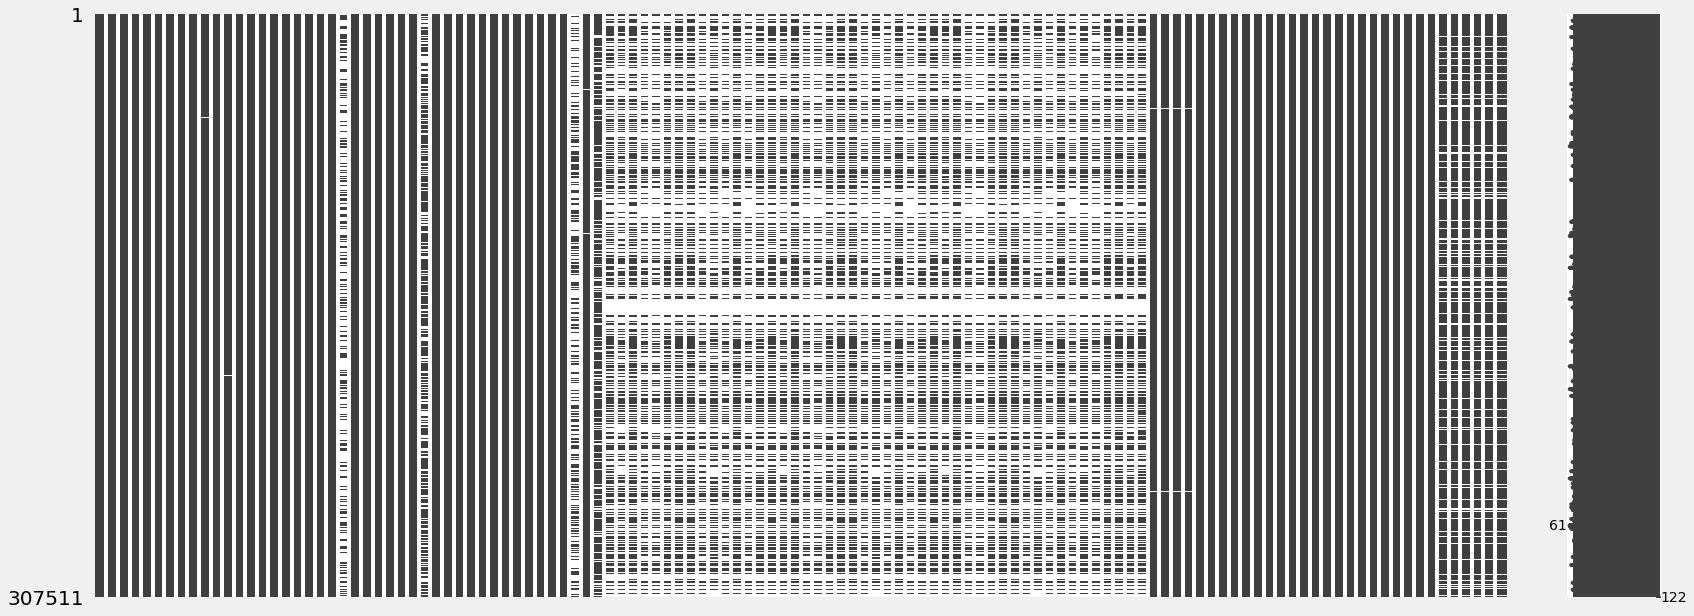

In [14]:
import missingno as mn
mn.matrix(applicationDF)

+ Dari pengamatan matrix di atas terbukti bahwa dataset memiliki banyak nilai yang hilang. Mari kita periksa untuk setiap kolom ada berapa % dari nilai yang hilang

In [15]:
# % null value in each column
round(applicationDF.isnull().sum()/applicationDF.shape[0]*100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

+ Ada lebih dari 40% data yang hilang 
+ Mari kita plot column Vs %_null dengan nilai 40% sebagai threshold

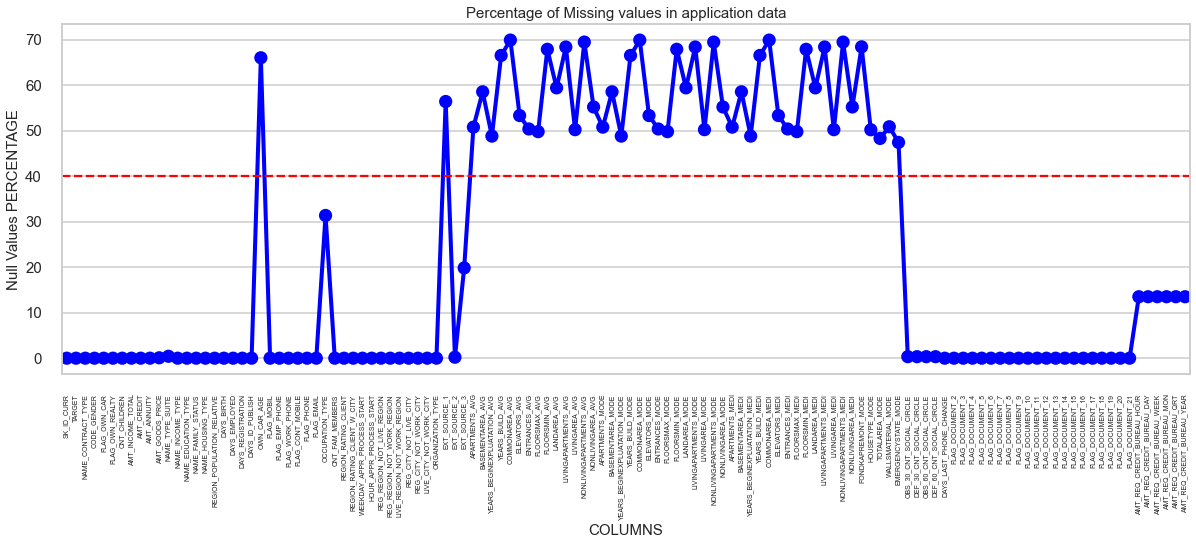

In [43]:
null_applicationDF = pd.DataFrame((applicationDF.isnull().sum())*100/applicationDF.shape[0]).reset_index()
null_applicationDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_applicationDF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()


+ % nuul value > 40% berada di atas garis trashold
+ Dan berlaku sebaliknya juga
+ Mari kita periksa column yang memiliki null value melebihi trashold tersebut

In [18]:
# Column yang NULL Value >= 40%
nullcol_40_application = null_applicationDF[null_applicationDF["Null Values Percentage"]>=40]
nullcol_40_application

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [19]:
# How many columns have more than or equal to 40% null values ?
len(nullcol_40_application)

49

Note :
+ Total ada 49 column yan memiliki null values > 40%
+ Tampaknya sebagian besar column dengan hadirnya null valus tertinggi tsb berkorerlasi dengan luasan appartemen tempat tinggal mereka baik itu kepeilikan pribadi/sewa yang mengajukan 'loan'/pinjaman.

### ** previousDF Missing Values

<AxesSubplot:>

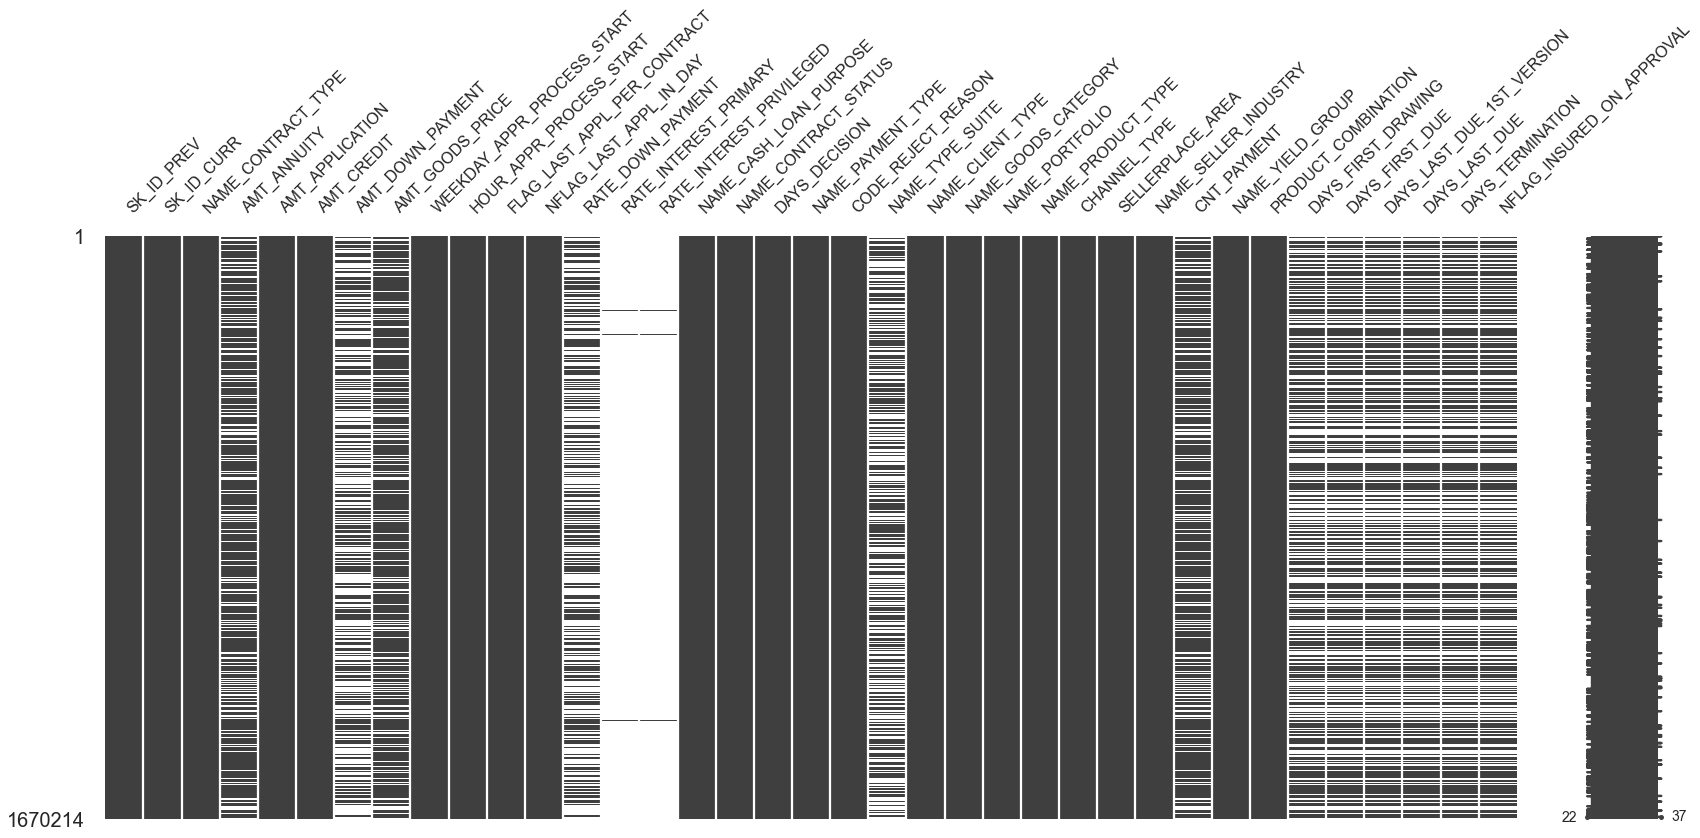

In [30]:
mn.matrix(previousDF)

In [21]:
# Checking the bull value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0]* 100.00,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

+ Banyak colum pada prevoousDF yang memiliki null value ternyata lebih besar dari 40%
+ Mari kit alihat pada column yang mana saja itu terjadi

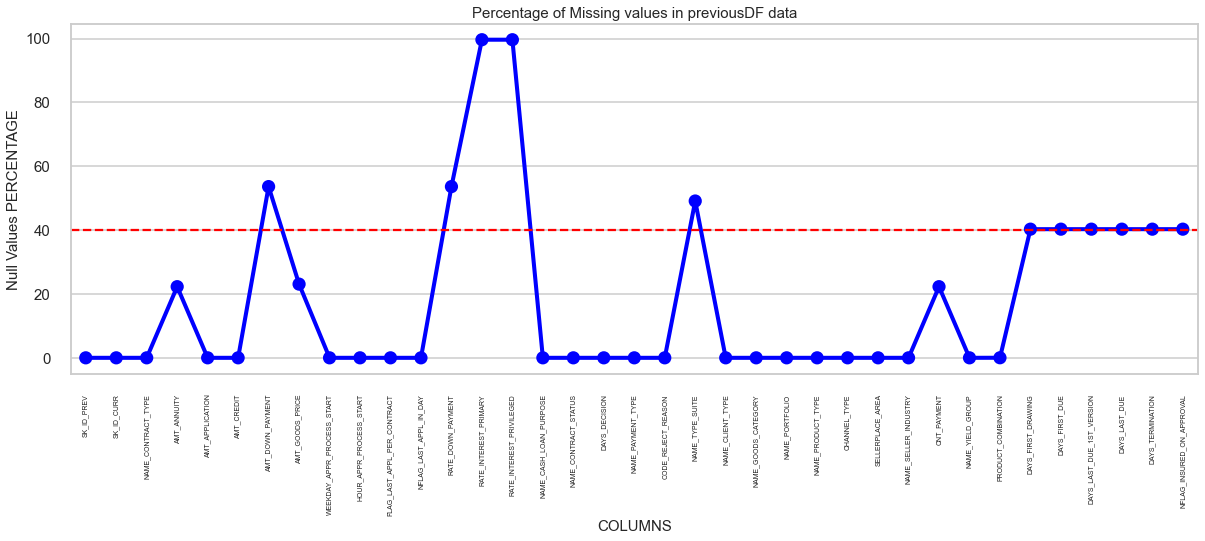

In [42]:
null_previousDF = pd.DataFrame((previousDF.isnull().sum())*100/previousDF.shape[0]).reset_index()
null_previousDF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(18,6))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_previousDF,color ='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in previousDF data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [23]:
# Column yang NULL Value >= 40%
nullcol_40_previous = null_previousDF[null_previousDF["Null Values Percentage"]>=40]
nullcol_40_previous

,Column Name,Null Values Percentage
6,AMT_DOWN_PAYMENT,53.636480
12,RATE_DOWN_PAYMENT,53.636480
13,RATE_INTEREST_PRIMARY,99.643698
14,RATE_INTEREST_PRIVILEGED,99.643698
20,NAME_TYPE_SUITE,49.119754
31,DAYS_FIRST_DRAWING,40.298129
32,DAYS_FIRST_DUE,40.298129
33,DAYS_LAST_DUE_1ST_VERSION,40.298129
34,DAYS_LAST_DUE,40.298129
35,DAYS_TERMINATION,40.298129


In [24]:
# How many columns have more than or equal to 40% null values ?
len(nullcol_40_previous)

11

+ Total ada 11 column yang memiliki null value > 40%
+ Column ini dapat di hapus namun seblum memutuskan untuk menghapus ada baiknya kita tinjau lebih lanjut dnegan mengamati korelasinya pada data kita

## Analyze & Delete Unnecessary Columns in applicationDF

### * EXT_SOURCE_X

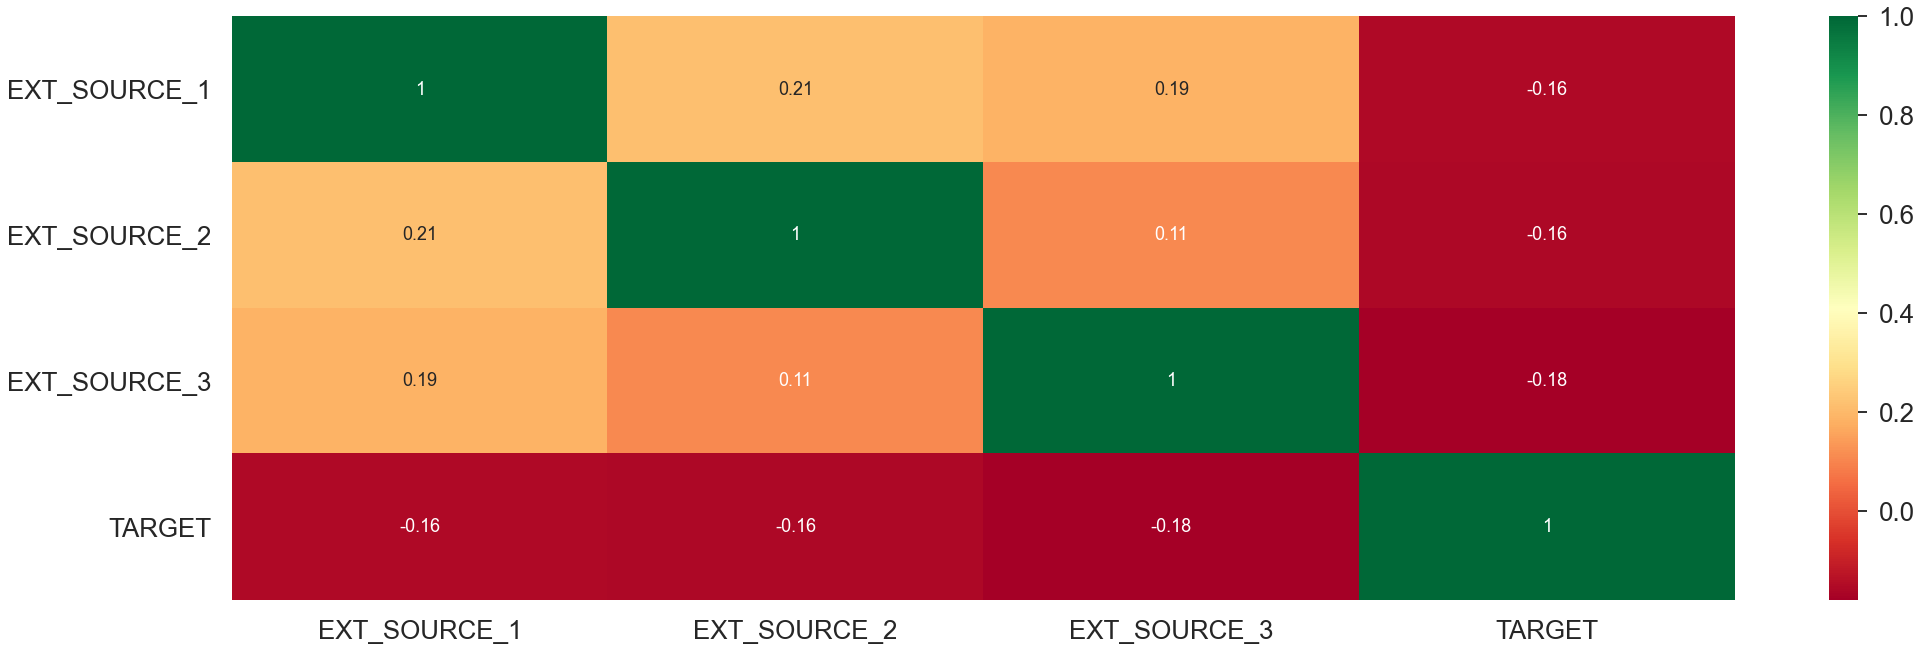

In [29]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
Source = applicationDF[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")

Note :
+ Berdasarkan Heatmap di atas, kita dapat melihat hampir tidak ada korelasi antara kolom EXT_SOURCE_X dan kolom target, sehingga kita dapat menghapus kolom tersebut. EXT_SOURCE_1 memiliki 56% nilai nol, sedangkan EXT_SOURCE_3 memiliki hampir 20% nilai nol  

In [31]:
# Create daftar kolom yang perlu dihapus termasuk kolom dengan >40% nilai nol
Unwanted_application = nullcol_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 

# as EXT_SOURCE_1 column is already included in nullcol_40_application 
len(Unwanted_application)

51

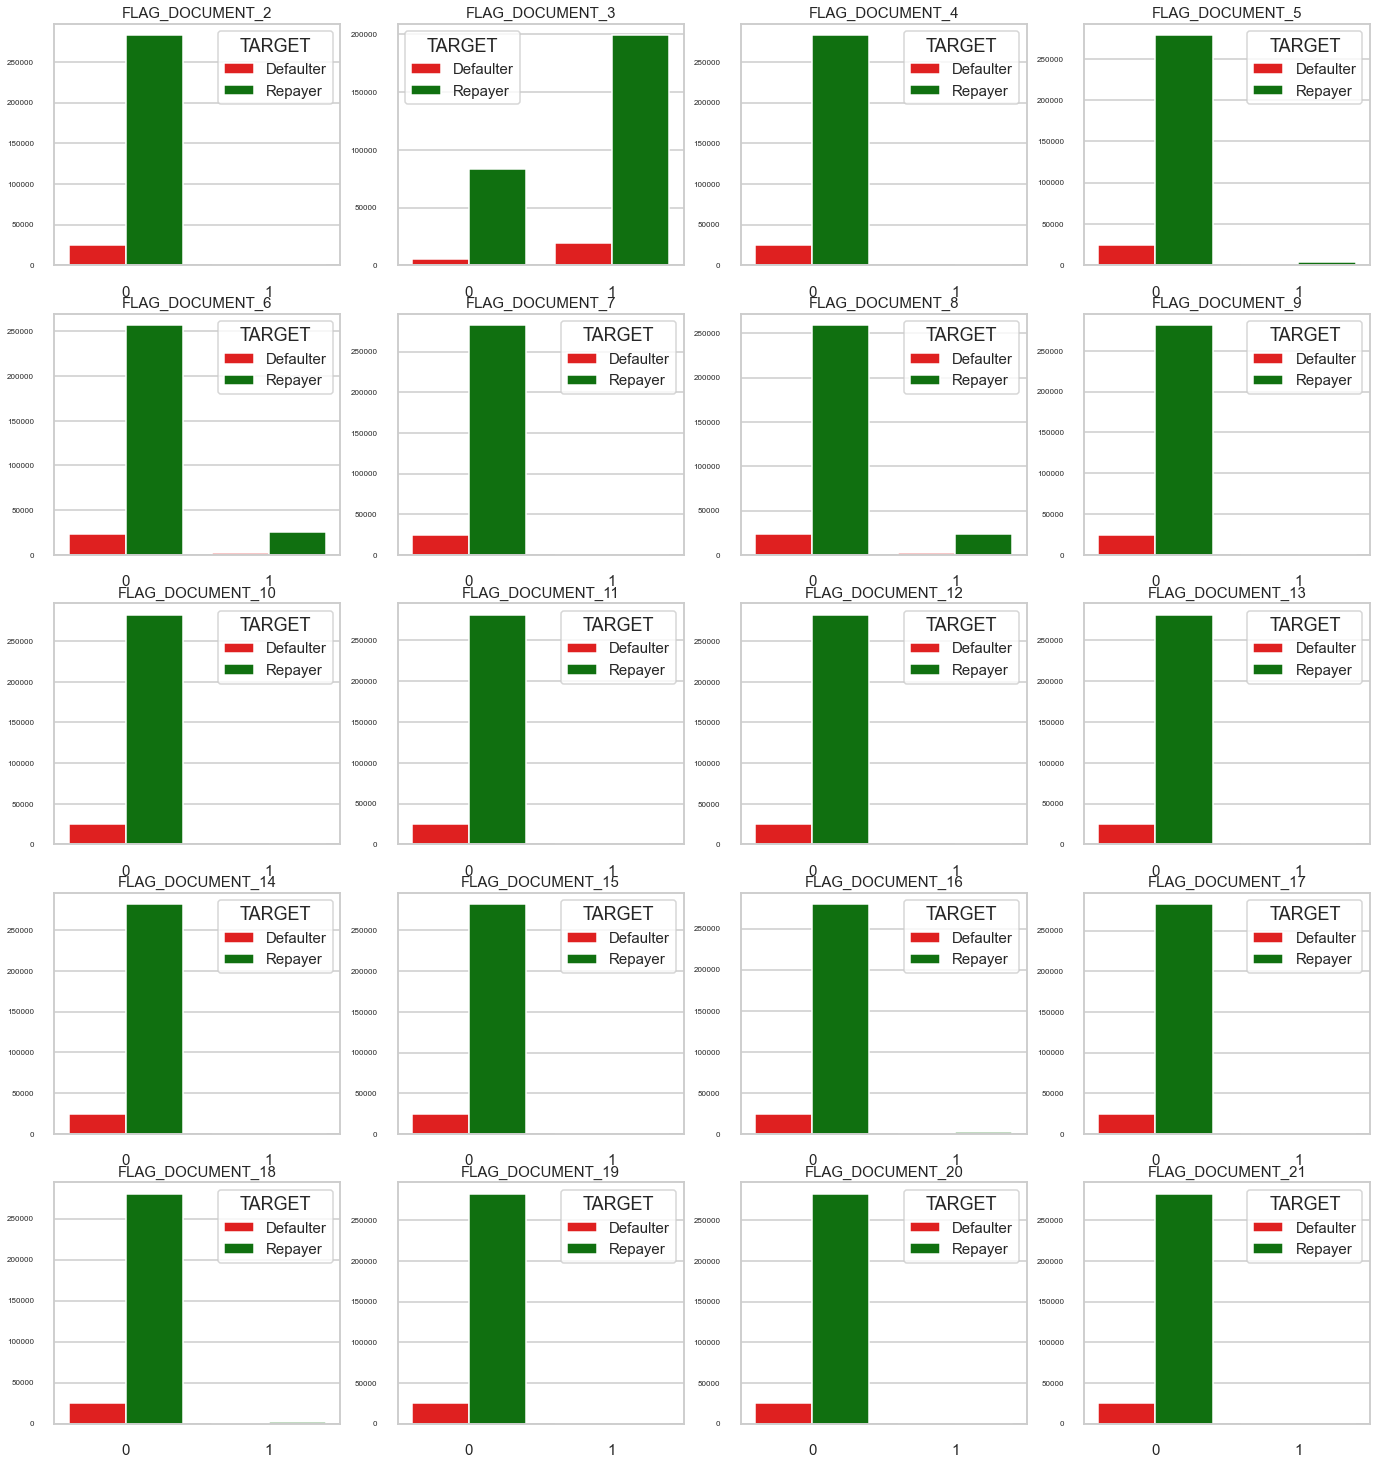

In [41]:
# Memeriksa relevansi Flag_Document dan apakah ada hubungannya dengan status pembayaran pinjaman

col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = applicationDF[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

Note :
+ Grafik di atas menunjukkan bahwa di sebagian besar kasus aplikasi pinjaman, klien yang mengajukan pinjaman belum menyerahkan FLAG_DOCUMENT_X kecuali FLAG_DOCUMENT_3. 
+ Jadi, Kecuali untuk FLAG_DOCUMENT_3, kita dapat menghapus kolom lainnya. 
+ Data menunjukkan jika peminjam telah mengirimkan FLAG_DOCUMENT_3 maka kemungkinan gagal bayar pinjaman semakin kecil.

In [44]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3') 
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

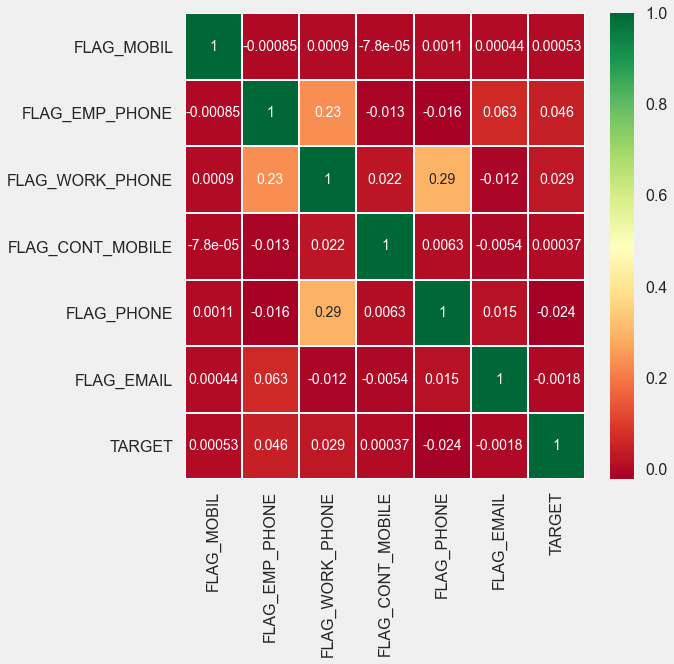

In [49]:
# Memeriksa apakah ada korelasi antara ponsel, telepon kantor, dll, email, anggota Keluarga, dan peringkat Wilayah

contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = applicationDF[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

+ Tidak ada korelasi antara  ponsel, email dll dengan pembayaran pinjaman; dengan demikian kolom ini dapat dihapus

In [50]:
# including the 6 FLAG columns to be deleted

contact_col.remove('TARGET') 
Unwanted_application = Unwanted_application + contact_col

len(Unwanted_application)

76

+ Ada 76 columns yang daoat di hapus dari applicationDF

In [51]:
# Dropping the unnecessary columns from applicationDF
applicationDF.drop(labels=Unwanted_application,axis=1,inplace=True)

In [52]:
# Inspecting the dataframe after removal of unnecessary columns
applicationDF.shape

(307511, 46)

In [53]:
# inspecting the column types after removal of unnecessary columns
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

## Analyze & Delete Unnecessary Columns in previousDF

In [54]:
# Getting the 11 columns which has more than 40% unknown
Unwanted_previous = nullcol_40_previous["Column Name"].tolist()
Unwanted_previous

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [55]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

Unwanted_previous = Unwanted_previous + Unnecessary_previous

len(Unwanted_previous)

15

In [56]:
# Dropping the unnecessary columns from previous
previousDF.drop(labels=Unwanted_previous,axis=1,inplace=True)

# Inspecting the dataframe after removal of unnecessary columns
previousDF.shape

(1670214, 22)

In [57]:
# inspecting the column types after after removal of unnecessary columns
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

## Standardize Values

### Strategy for applicationDF:

+ Ubah DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH dari negatif ke positif karena hari tidak boleh negatif.
+ Konversi DAYS_BIRTH dari nilai negatif ke positif dan hitung usia dan buat kolom kategoris bins
+ Kategorikan variabel jumlah ke dalam bin
+ Ubah kolom peringkat wilayah dan beberapa kolom lainnya menjadi kategorikal

In [59]:
# Converting Negative days to positive days

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    applicationDF[col] = abs(applicationDF[col])

In [60]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
applicationDF['AMT_INCOME_TOTAL']=applicationDF['AMT_INCOME_TOTAL']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

applicationDF['AMT_INCOME_RANGE']=pd.cut(applicationDF['AMT_INCOME_TOTAL'],bins,labels=slot)

In [61]:
applicationDF['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: AMT_INCOME_RANGE, dtype: float64

Note :
+ Lebih dari 50% pemohon pinjaman memiliki jumlah pendapatan di kisaran 100K-200K. Hampir 92% pemohon pinjaman memiliki pendapatan kurang dari 300K

In [62]:
# Creating bins for Credit amount
applicationDF['AMT_CREDIT']=applicationDF['AMT_CREDIT']/100000

bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']

applicationDF['AMT_CREDIT_RANGE']=pd.cut(applicationDF['AMT_CREDIT'],bins=bins,labels=slots)

In [63]:
#checking the binning of data and % of data in each category
applicationDF['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

+ Lebih dari 16% pemohon pinjaman telah mengambil pinjaman yang berjumlah lebih dari 1M.

In [64]:
# Creating bins for Age
applicationDF['AGE'] = applicationDF['DAYS_BIRTH'] // 365
bins = [0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

applicationDF['AGE_GROUP']=pd.cut(applicationDF['AGE'],bins=bins,labels=slots)

In [65]:
#checking the binning of data and % of data in each category
applicationDF['AGE_GROUP'].value_counts(normalize=True)*100


50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: AGE_GROUP, dtype: float64

+ 31% pemohon pinjaman berusia di atas 50 tahun. Lebih dari 55% pemohon pinjaman berusia di atas 40 tahun.

In [66]:
# Creating bins for Employement Time
applicationDF['YEARS_EMPLOYED'] = applicationDF['DAYS_EMPLOYED'] // 365
bins = [0,5,10,20,30,40,50,60,150]
slots = ['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']

applicationDF['EMPLOYMENT_YEAR']=pd.cut(applicationDF['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [67]:
#checking the binning of data and % of data in each category
applicationDF['EMPLOYMENT_YEAR'].value_counts(normalize=True)*100

0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: EMPLOYMENT_YEAR, dtype: float64

+ Lebih dari 55% pemohon pinjaman memiliki pengalaman kerja dalam waktu 0-5 tahun dan hampir 80% dari mereka memiliki pengalaman kerja kurang dari 10 tahun

In [68]:
#Checking the number of unique values each column possess to identify categorical columns
applicationDF.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYMENT_YEAR                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

## Data Type Conversion

In [69]:
# inspecting the column types if they are in correct data type using the above result.
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

+ Kolom numerik sudah dalam format int64 dan float64. Oleh karena itu dilanjutkan dengan kolom lainnya.

In [70]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]
for col in categorical_columns:
    applicationDF[col] =pd.Categorical(applicationDF[col])

In [71]:
# inspecting the column types if the above conversion is reflected
applicationDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

### Standardize Values for previousDF

### Strategi untuk DF sebelumnya:
+ Konversi DAYS_DECISION dari nilai negatif ke positif dan buat kolom kategoris bins.
+ Ubah tujuan pinjaman dan beberapa kolom lainnya menjadi kategoris.

In [72]:
#Checking the number of unique values each column possess to identify categorical columns
previousDF.nunique().sort_values() 

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [73]:
# inspecting the column types if the above conversion is reflected
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [74]:
#Converting negative days to positive days 
previousDF['DAYS_DECISION'] = abs(previousDF['DAYS_DECISION'])

In [75]:
#age group calculation e.g. 388 will be grouped as 300-400
previousDF['DAYS_DECISION_GROUP'] = (previousDF['DAYS_DECISION']-(previousDF['DAYS_DECISION'] % 400)).astype(str)+'-'+ ((previousDF['DAYS_DECISION'] - (previousDF['DAYS_DECISION'] % 400)) + (previousDF['DAYS_DECISION'] % 400) + (400 - (previousDF['DAYS_DECISION'] % 400))).astype(str)

In [76]:
previousDF['DAYS_DECISION_GROUP'].value_counts(normalize=True)*100

0-400        37.490525
400-800      22.944724
800-1200     12.444753
1200-1600     7.904556
2400-2800     6.297456
1600-2000     5.795784
2000-2400     5.684960
2800-3200     1.437241
Name: DAYS_DECISION_GROUP, dtype: float64

+ Hampir 37% pemohon pinjaman telah mengajukan pinjaman baru dalam waktu 0-400 hari sejak keputusan pinjaman sebelumnya

In [77]:
#Converting Categorical columns from Object to categorical 
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','DAYS_DECISION_GROUP']

for col in Catgorical_col_p:
    previousDF[col] =pd.Categorical(previousDF[col])

In [78]:
# inspecting the column types after conversion
previousDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

# Null Value Data Imputation

### Imputing Null Values in applicationDF

### Strategy ImputationDF:
+ Untuk memasukkan nilai null dalam variabel kategori yang memiliki persentase nol lebih rendah, mode() digunakan untuk menghitung item yang paling sering.
+ Untuk memasukkan nilai nol dalam variabel kategori yang memiliki persentase nol lebih tinggi, kategori baru dibuat.
+ Untuk menghitung nilai nol dalam variabel numerik yang memiliki persentase nol lebih rendah, median() digunakan sebagai
    + Tidak ada outlier di kolom
    + Rata-rata nilai desimal yang dikembalikan dan median yang mengembalikan bilangan bulat dan kolomnya adalah jumlah permintaan

In [80]:
# checking the null value % of each column in applicationDF dataframe
round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

+ Impute categorical variable 'NAME_TYPE_SUITE' yang memiliki persentase nol lebih rendah (0,42%) dengan kategori paling sering menggunakan mode()[0]:

In [81]:
applicationDF['NAME_TYPE_SUITE'].describe()

count            306219
unique                7
top       Unaccompanied
freq             248526
Name: NAME_TYPE_SUITE, dtype: object

In [82]:
applicationDF['NAME_TYPE_SUITE'].fillna((applicationDF['NAME_TYPE_SUITE'].mode()[0]),inplace = True)

+ Impute categorical variable 'OCCUPATION_TYPE' yang memiliki persentase nol lebih tinggi(31,35%) dengan kategori baru karena menetapkan ke kategori yang ada dapat memengaruhi analisis:

In [83]:
applicationDF['OCCUPATION_TYPE'] = applicationDF['OCCUPATION_TYPE'].cat.add_categories('Unknown')
applicationDF['OCCUPATION_TYPE'].fillna('Unknown', inplace =True) 

+ Impute numerical variable dengan median karena tidak ada outlier yang dapat dilihat dari hasil deskripsi() dan mean() mengembalikan nilai desimal dan kolom ini mewakili jumlah pertanyaan yang dibuat yang tidak boleh desimal:

In [84]:
applicationDF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


Impute with median as mean has decimals and this is number of requests

In [85]:
amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
    applicationDF[col].fillna(applicationDF[col].median(),inplace = True)

In [86]:
# checking the null value % of each column in previousDF dataframe
round(applicationDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.02
NAME_TYPE_SUITE                0.00
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
OCCUPATION_TYPE                0.00
CNT_FAM_MEMBERS                0.00
REGION_RATING_CLIENT           0.00
REGION_RATING_CLIENT_W_CITY    0.00
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
REG_REGION_NOT_LIVE_REGION  

Note :
+ Kami masih memiliki beberapa nilai nol di kolom: AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. 
+ Kita dapat mengabaikannya karena persentase ini sangat kecil.

## Imputing Null Values in previousDF

## Strategy for applicationDF
+ Untuk imputing null value dalam kolom numerik, kami menganalisis status pinjaman dan nilai yang ditetapkan.
+ Untuk imputing null value dalam variabel kontinu, kami memplot distribusi kolom dan menggunakan
    + median jika distribusinya skewed
    + mode jika pola distribusi preversed.

In [87]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                 0.00
SK_ID_CURR                 0.00
NAME_CONTRACT_TYPE         0.00
AMT_ANNUITY               22.29
AMT_APPLICATION            0.00
AMT_CREDIT                 0.00
AMT_GOODS_PRICE           23.08
NAME_CASH_LOAN_PURPOSE     0.00
NAME_CONTRACT_STATUS       0.00
DAYS_DECISION              0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CLIENT_TYPE           0.00
NAME_GOODS_CATEGORY        0.00
NAME_PORTFOLIO             0.00
NAME_PRODUCT_TYPE          0.00
CHANNEL_TYPE               0.00
SELLERPLACE_AREA           0.00
NAME_SELLER_INDUSTRY       0.00
CNT_PAYMENT               22.29
NAME_YIELD_GROUP           0.00
PRODUCT_COMBINATION        0.02
DAYS_DECISION_GROUP        0.00
dtype: float64

Impute AMT_ANNUITY with median as the distribution is greatly skewed:

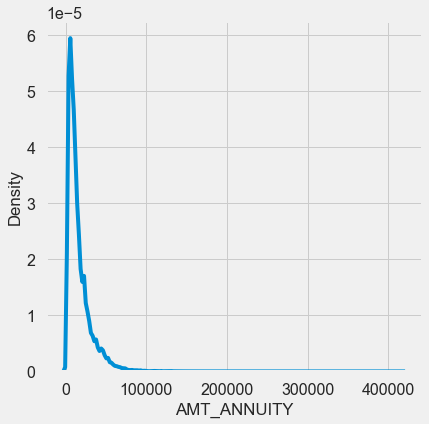

In [88]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_ANNUITY'])
plt.show()

Note :
Ada satu puncak di sisi kiri distribusi dan ini menunjukkan adanya outlier dan karenanya imputasi dengan mean tidak akan menjadi pendekatan yang tepat dan karenanya imputasi dengan median.    

In [89]:
previousDF['AMT_ANNUITY'].fillna(previousDF['AMT_ANNUITY'].median(),inplace = True)

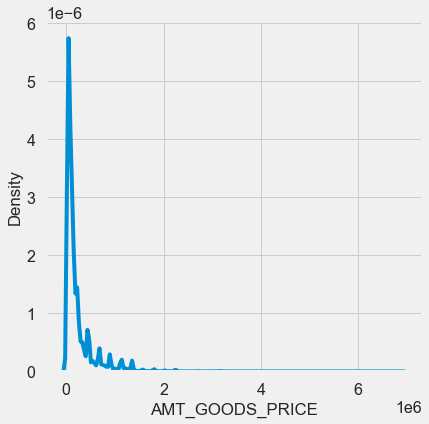

In [90]:
plt.figure(figsize=(6,6))
sns.kdeplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])])
plt.show()

+ Ada beberapa puncak di sepanjang distribusi. Mari kita hitung menggunakan modus, mean dan median dan lihat apakah distribusinya masih kurang lebih sama.

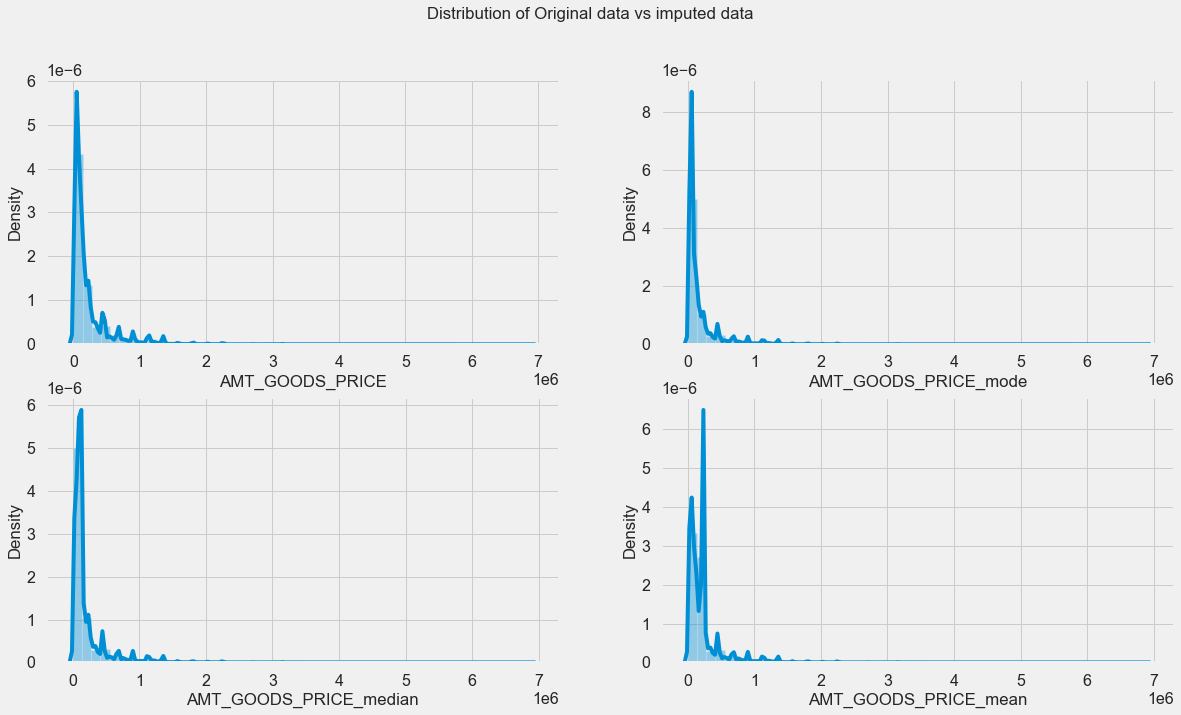

In [91]:
statsDF = pd.DataFrame() # new dataframe with columns imputed with mode, median and mean
statsDF['AMT_GOODS_PRICE_mode'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOODS_PRICE_median'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].median())
statsDF['AMT_GOODS_PRICE_mean'] = previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mean())

cols = ['AMT_GOODS_PRICE_mode', 'AMT_GOODS_PRICE_median','AMT_GOODS_PRICE_mean']

plt.figure(figsize=(18,10))
plt.suptitle('Distribution of Original data vs imputed data')
plt.subplot(221)
sns.distplot(previousDF['AMT_GOODS_PRICE'][pd.notnull(previousDF['AMT_GOODS_PRICE'])]);
for i in enumerate(cols): 
    plt.subplot(2,2,i[0]+2)
    sns.distplot(statsDF[i[1]])

Distribusi asli lebih dekat dengan distribusi data yang diperhitungkan dengan mode dalam kasus ini

In [92]:
previousDF['AMT_GOODS_PRICE'].fillna(previousDF['AMT_GOODS_PRICE'].mode()[0], inplace=True)

+ Impute CNT_PAYMENT dengan 0 sebagai NAME_CONTRACT_STATUS untuk ini menunjukkan bahwa sebagian besar pinjaman ini tidak dimulai:

In [93]:
previousDF.loc[previousDF['CNT_PAYMENT'].isnull(),'NAME_CONTRACT_STATUS'].value_counts()

Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: NAME_CONTRACT_STATUS, dtype: int64

In [94]:
previousDF['CNT_PAYMENT'].fillna(0,inplace = True)

In [95]:
# checking the null value % of each column in previousDF dataframe
round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)

SK_ID_PREV                0.00
SK_ID_CURR                0.00
NAME_CONTRACT_TYPE        0.00
AMT_ANNUITY               0.00
AMT_APPLICATION           0.00
AMT_CREDIT                0.00
AMT_GOODS_PRICE           0.00
NAME_CASH_LOAN_PURPOSE    0.00
NAME_CONTRACT_STATUS      0.00
DAYS_DECISION             0.00
NAME_PAYMENT_TYPE         0.00
CODE_REJECT_REASON        0.00
NAME_CLIENT_TYPE          0.00
NAME_GOODS_CATEGORY       0.00
NAME_PORTFOLIO            0.00
NAME_PRODUCT_TYPE         0.00
CHANNEL_TYPE              0.00
SELLERPLACE_AREA          0.00
NAME_SELLER_INDUSTRY      0.00
CNT_PAYMENT               0.00
NAME_YIELD_GROUP          0.00
PRODUCT_COMBINATION       0.02
DAYS_DECISION_GROUP       0.00
dtype: float64

+ We still have few null values in the PRODUCT_COMBINATION column. We can ignore as this percentage is very less.

## Identifying the outliers

Finding outlier information in applicationDF

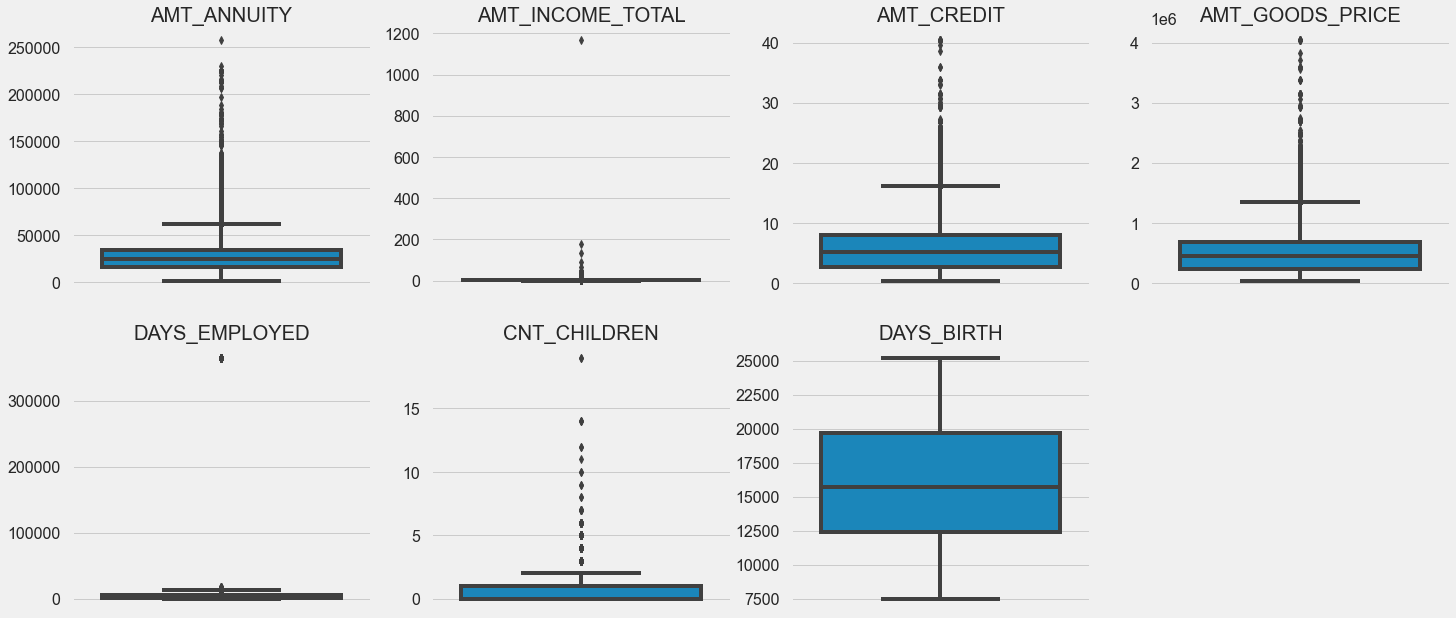

In [96]:
plt.figure(figsize=(22,10))

app_outlier_col_1 = ['AMT_ANNUITY','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_EMPLOYED']
app_outlier_col_2 = ['CNT_CHILDREN','DAYS_BIRTH']
for i in enumerate(app_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(app_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=applicationDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

Dapat dilihat bahwa dalam data aplikasi saat ini
+ AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN memiliki sejumlah outlier.
+ AMT_INCOME_TOTAL memiliki jumlah outlier yang sangat banyak yang menunjukkan bahwa sebagian kecil dari pemohon pinjaman memiliki pendapatan yang tinggi jika dibandingkan dengan yang lain.
+ DAYS_BIRTH tidak memiliki outlier yang berarti data yang tersedia dapat diandalkan.
+ DAYS_EMPLOYED memiliki nilai outlier sekitar 350000(hari) yaitu sekitar 958 tahun yang tidak mungkin dan karenanya ini harus menjadi entri yang salah.

We can see the stats for these columns below as well.

In [97]:
applicationDF[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'DAYS_BIRTH','CNT_CHILDREN','DAYS_EMPLOYED']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,DAYS_BIRTH,CNT_CHILDREN,DAYS_EMPLOYED
count,307499.000000,307511.000000,307511.000000,3.072330e+05,307511.000000,307511.000000,307511.000000
mean,27108.573909,1.687979,5.990260,5.383962e+05,16036.995067,0.417052,67724.742149
std,14493.737315,2.371231,4.024908,3.694465e+05,4363.988632,0.722121,139443.751806
min,1615.500000,0.256500,0.450000,4.050000e+04,7489.000000,0.000000,0.000000
25%,16524.000000,1.125000,2.700000,2.385000e+05,12413.000000,0.000000,933.000000
50%,24903.000000,1.471500,5.135310,4.500000e+05,15750.000000,0.000000,2219.000000
75%,34596.000000,2.025000,8.086500,6.795000e+05,19682.000000,1.000000,5707.000000
max,258025.500000,1170.000000,40.500000,4.050000e+06,25229.000000,19.000000,365243.000000


Finding outlier information in previousDF

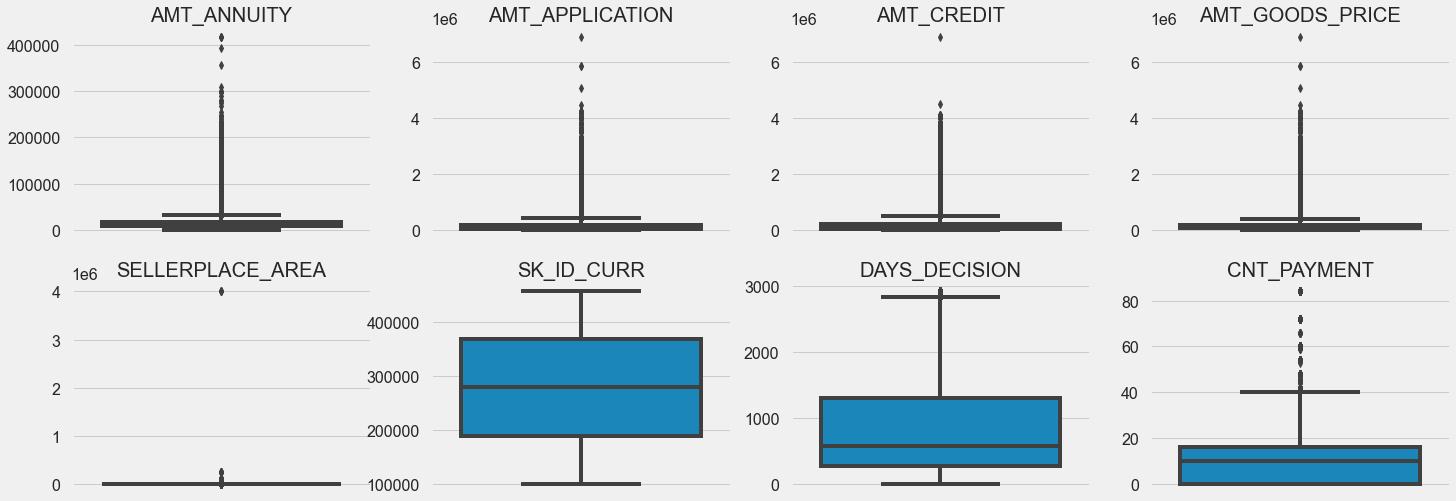

In [98]:
plt.figure(figsize=(22,8))

prev_outlier_col_1 = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA']
prev_outlier_col_2 = ['SK_ID_CURR','DAYS_DECISION','CNT_PAYMENT']
for i in enumerate(prev_outlier_col_1):
    plt.subplot(2,4,i[0]+1)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("")

for i in enumerate(prev_outlier_col_2):
    plt.subplot(2,4,i[0]+6)
    sns.boxplot(y=previousDF[i[1]])
    plt.title(i[1])
    plt.ylabel("") 

Dapat dilihat bahwa pada data aplikasi sebelumnya
+ AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA memiliki banyak sekali outlier.
+ CNT_PAYMENT memiliki sedikit nilai outlier.
+ SK_ID_CURR adalah kolom ID dan karenanya tidak ada outlier.
+ DAYS_DECISION memiliki sedikit jumlah outlier yang menunjukkan bahwa keputusan aplikasi sebelumnya telah diambil sejak lama.

We can see the stats for these columns below as well.

In [99]:
previousDF[['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'SELLERPLACE_AREA','CNT_PAYMENT','DAYS_DECISION']].describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_DECISION
count,1.670214e+06,1.670214e+06,1.670213e+06,1.670214e+06,1.670214e+06,1.670214e+06,1.670214e+06
mean,1.490651e+04,1.752339e+05,1.961140e+05,1.856429e+05,3.139511e+02,1.247621e+01,8.806797e+02
std,1.317751e+04,2.927798e+05,3.185746e+05,2.871413e+05,7.127443e+03,1.447588e+01,7.790997e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00
25%,7.547096e+03,1.872000e+04,2.416050e+04,4.500000e+04,-1.000000e+00,0.000000e+00,2.800000e+02
50%,1.125000e+04,7.104600e+04,8.054100e+04,7.105050e+04,3.000000e+00,1.000000e+01,5.810000e+02
75%,1.682403e+04,1.803600e+05,2.164185e+05,1.804050e+05,8.200000e+01,1.600000e+01,1.300000e+03
max,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,4.000000e+06,8.400000e+01,2.922000e+03


# 5. Data Analysis

## Strategy :
Alur analisis data telah direncanakan dengan cara sebagai berikut:

+ Ketidakseimbangan dalam Data
+ Analisis Data Kategoris
    + Analisis Univariat tersegmentasi kategoris
    + Analisis Bi/Multivariat Kategoris
+ Analisis Data Numerik
    + Bi-furkasi database berdasarkan data TARGET
    + Matriks Korelasi
    + Analisis Univariat tersegmentasi numerik
    + Analisis Numerik Bi/Multivariat

## 5.1 Imbalance Analysis

In [128]:
# setting params
params = {'legend.fontsize': 'small',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'small',
          'axes.titlesize':'small',
          'xtick.labelsize':'small',
          'ytick.labelsize':'small'}

sns.set_style('whitegrid')
sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

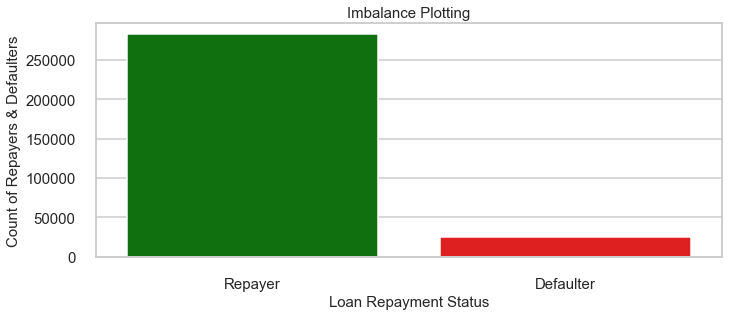

In [129]:
Imbalance = applicationDF["TARGET"].value_counts().reset_index()

plt.figure(figsize=(10,4))
x= ['Repayer','Defaulter']
sns.barplot(x,"TARGET",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

In [130]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))
print('Ratios of imbalance in relative with respect to Repayer and Defaulter datas is %.2f : 1 (approx)'%(count_0/count_1))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07
Ratios of imbalance in relative with respect to Repayer and Defaulter datas is 11.39 : 1 (approx)


## 5.2 Plotting Functions

Following are the common functions customized to perform uniform anaysis that is called for all plots:

In [131]:
# fungsi untuk memplot countplot berulang dalam analisis kategoris univariat pada applicationDF
# Fungsi ini akan membuat dua subplot:
# 1. Hitung plot kolom kategoris dengan TARGET;
# 2. Persentase mangkir dalam kolom

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = applicationDF[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = applicationDF[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

In [132]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

In [133]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=applicationDF, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

In [134]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [135]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

## 5.3 Categorical Variables Analysis

### 5.3.1 Segmented Univariate Analysis

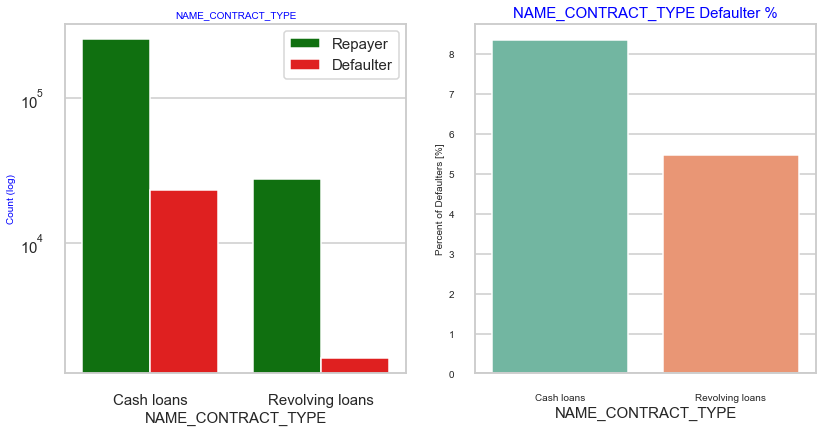

In [136]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

+ Jenis kontrak: Pinjaman bergulir hanya sebagian kecil (10%) dari total jumlah pinjaman; pada saat yang sama, jumlah pinjaman Bergulir yang lebih besar, dibandingkan dengan frekuensinya, tidak dilunasi.

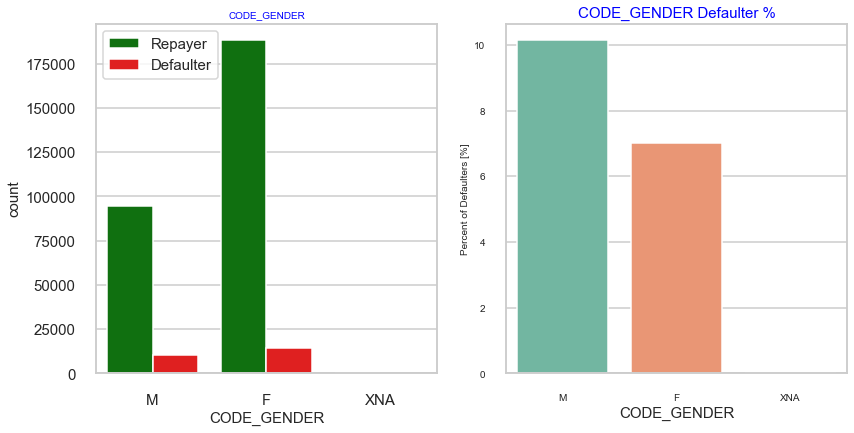

In [137]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

+ Jumlah klien wanita hampir dua kali lipat jumlah klien pria. Berdasarkan persentase kredit macet, laki-laki memiliki peluang lebih tinggi untuk tidak mengembalikan pinjaman mereka (~10%), dibandingkan dengan perempuan (~7%)

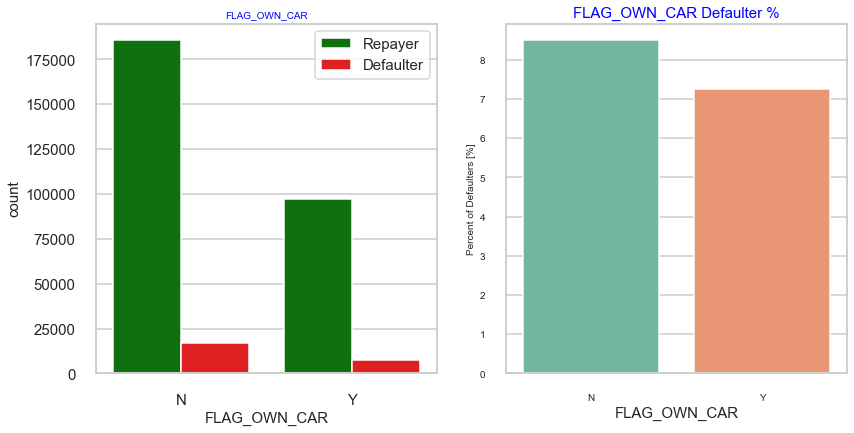

In [138]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

+ Klien yang memiliki mobil adalah separuh dari klien yang tidak memiliki mobil. Tetapi berdasarkan persentase default, tidak ada korelasi antara kepemilikan mobil dan pembayaran pinjaman karena dalam kedua kasus persentase default hampir sama.

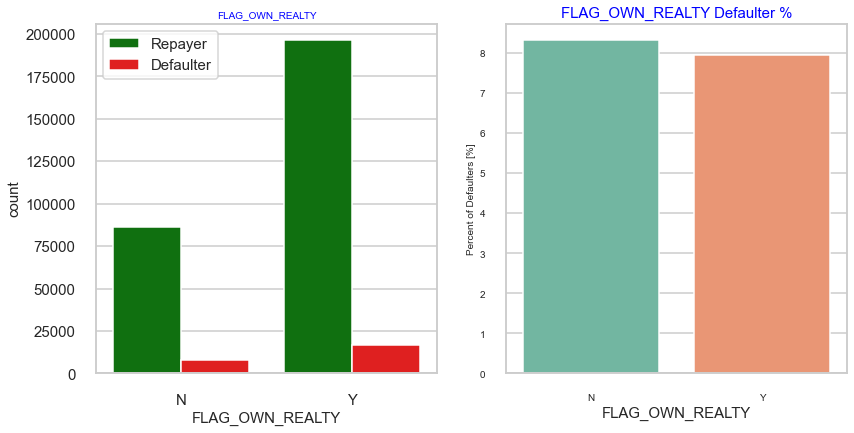

In [139]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

#### Kesimpulan:
+ Klien yang memiliki real estat lebih dari dua kali lipat klien yang tidak memilikinya. Tetapi tingkat default dari kedua kategori hampir sama (~ 8%). Jadi tidak ada korelasi antara memiliki kenyataan dan gagal bayar pinjaman.

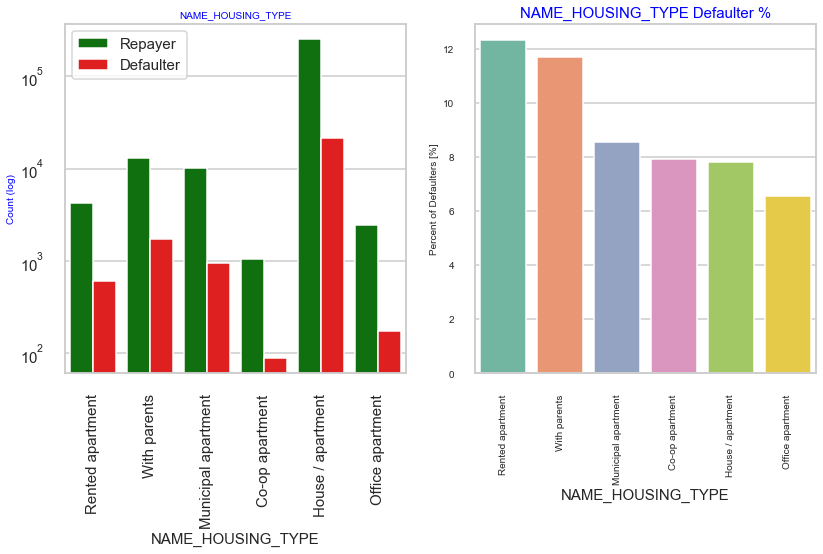

In [140]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

#### Kesimpulan:
+ Mayoritas orang tinggal di Rumah/apartemen
+ Orang yang tinggal di apartemen kantor memiliki tingkat default terendah
+ Orang yang tinggal bersama orang tua (~11,5%) dan tinggal di apartemen sewaan (>12%) memiliki kemungkinan gagal bayar yang lebih tinggi

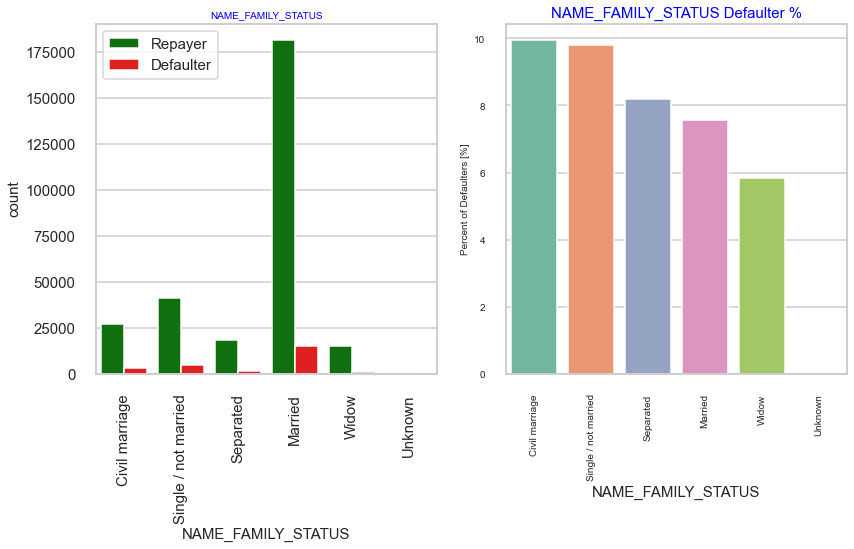

In [141]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)


#### Kesimpulan:
+ Sebagian besar orang yang telah mengambil pinjaman sudah menikah, diikuti oleh Single/belum menikah dan pernikahan sipil
+ Dalam hal persentase tidak dapat melunasi pinjaman, Perkawinan Sipil memiliki persentase tertinggi dari tidak dapat dilunasi (10%), dengan Janda terendah (kecuali Tidak Diketahui).

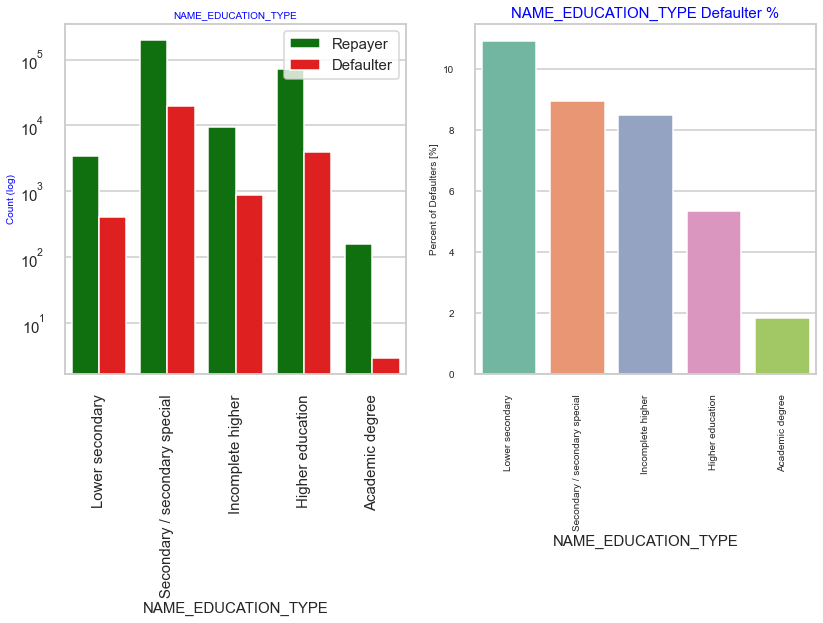

In [142]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)


#### Kesimpulan:
+ Mayoritas klien memiliki pendidikan khusus Menengah / menengah, diikuti oleh klien dengan pendidikan Tinggi. Hanya sejumlah kecil yang memiliki gelar akademis
+ Kategori menengah bawah, meskipun jarang, memiliki tingkat pengembalian pinjaman terbesar (11%). Orang-orang dengan gelar Akademik memiliki tingkat default kurang dari 2%.

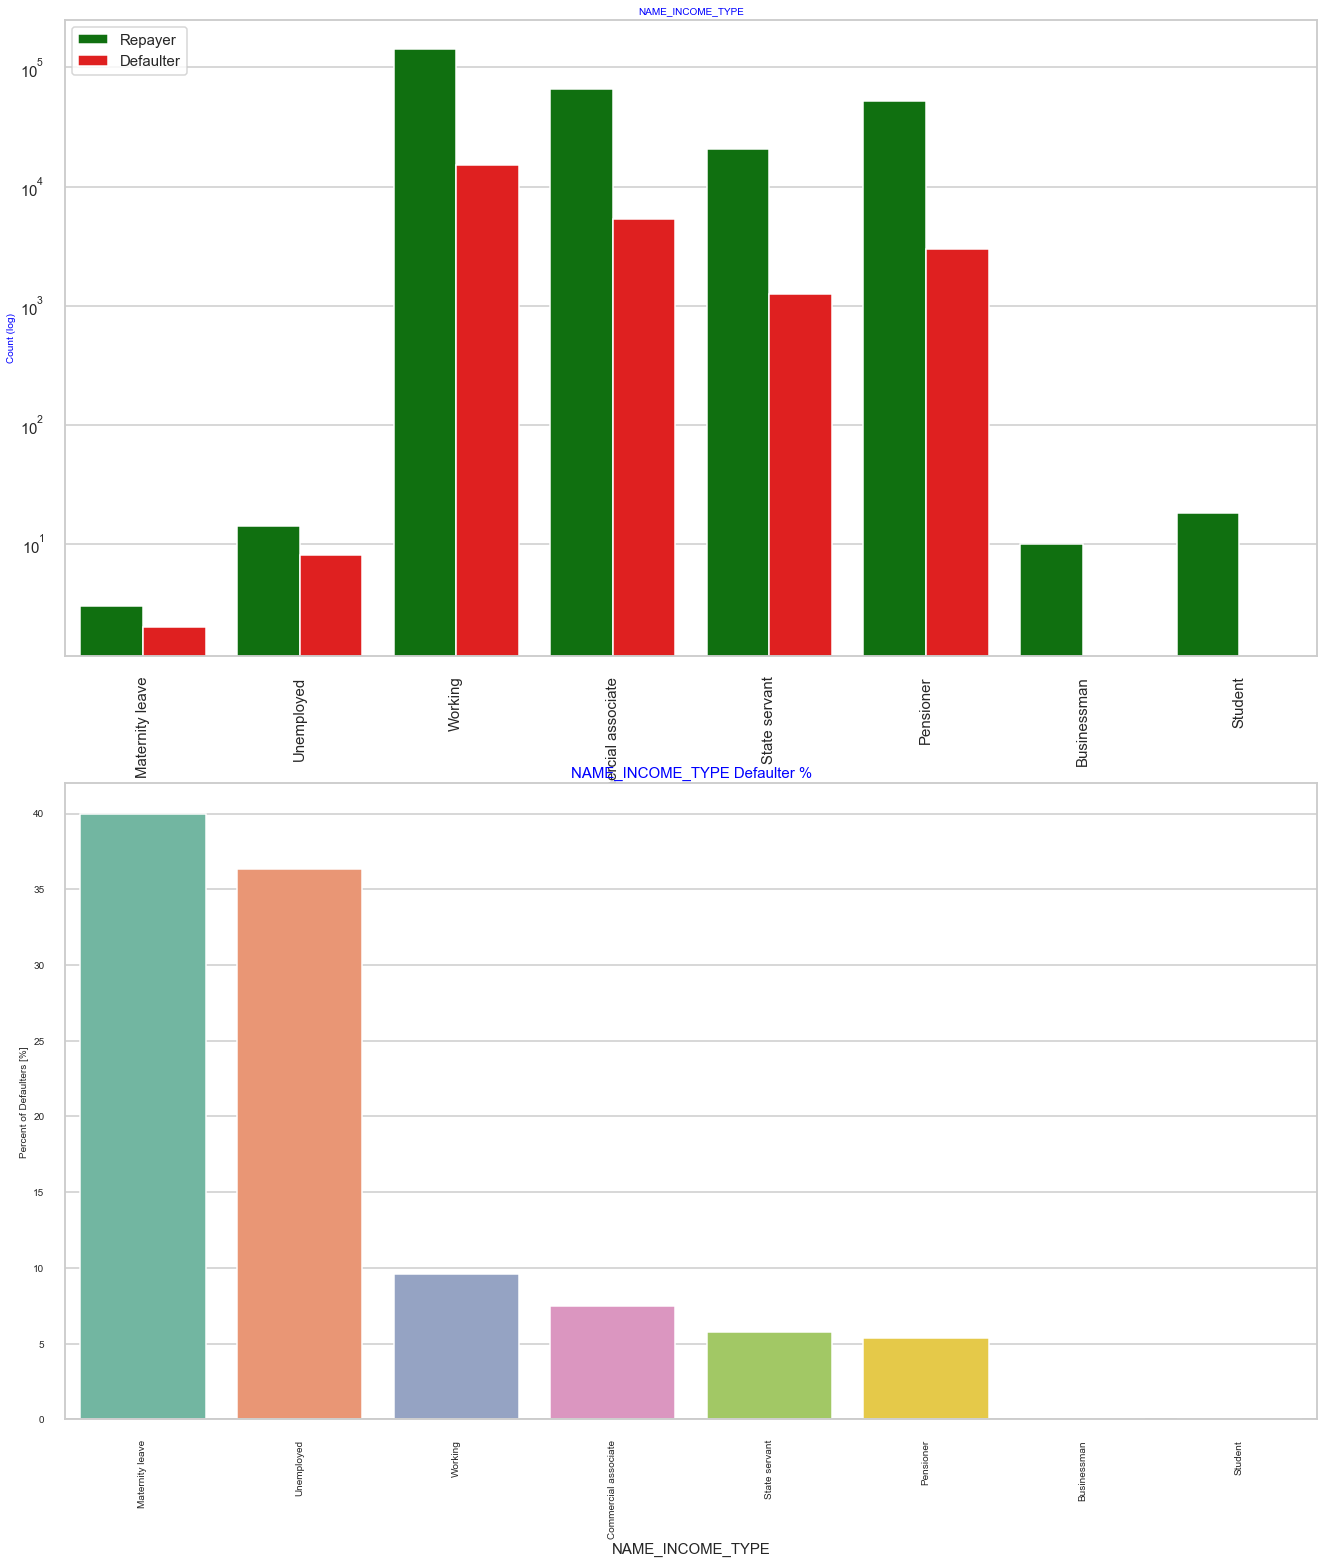

In [143]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

#### Kesimpulan:
+ Sebagian besar pemohon pinjaman memiliki jenis pendapatan sebagai Bekerja, diikuti oleh Asosiasi Komersial, Pensiunan dan Pegawai Negeri.
+ Pelamar dengan jenis penghasilan Cuti hamil memiliki rasio hampir 40% tidak mengembalikan pinjaman, diikuti oleh Pengangguran (37%). Jenis pendapatan selebihnya berada di bawah rata-rata 10% karena tidak mengembalikan pinjaman.
+ Pelajar dan Pengusaha, meskipun jumlahnya lebih sedikit tidak memiliki catatan default. Dengan demikian kedua kategori ini paling aman untuk memberikan pinjaman.

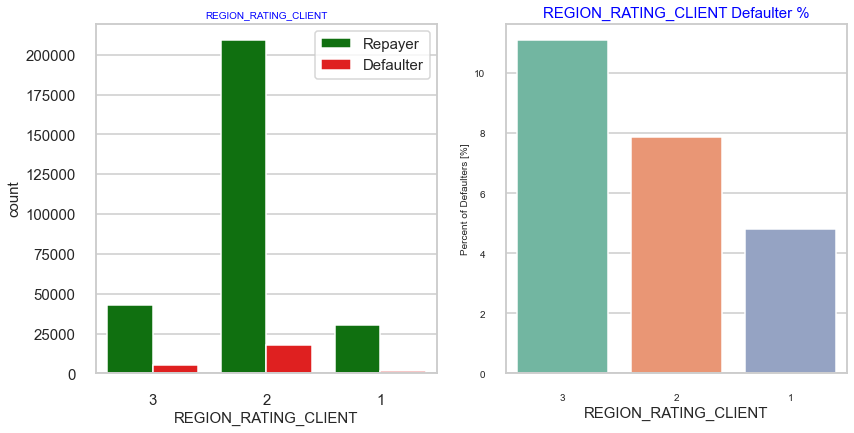

In [144]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

#### Kesimpulan:
+ Sebagian besar pelamar tinggal di tempat Region_Rating 2.
+ Peringkat Wilayah 3 memiliki tingkat default tertinggi (11%)
+ Pemohon yang tinggal di Region_Rating 1 memiliki kemungkinan gagal bayar terendah, sehingga lebih aman untuk menyetujui pinjaman

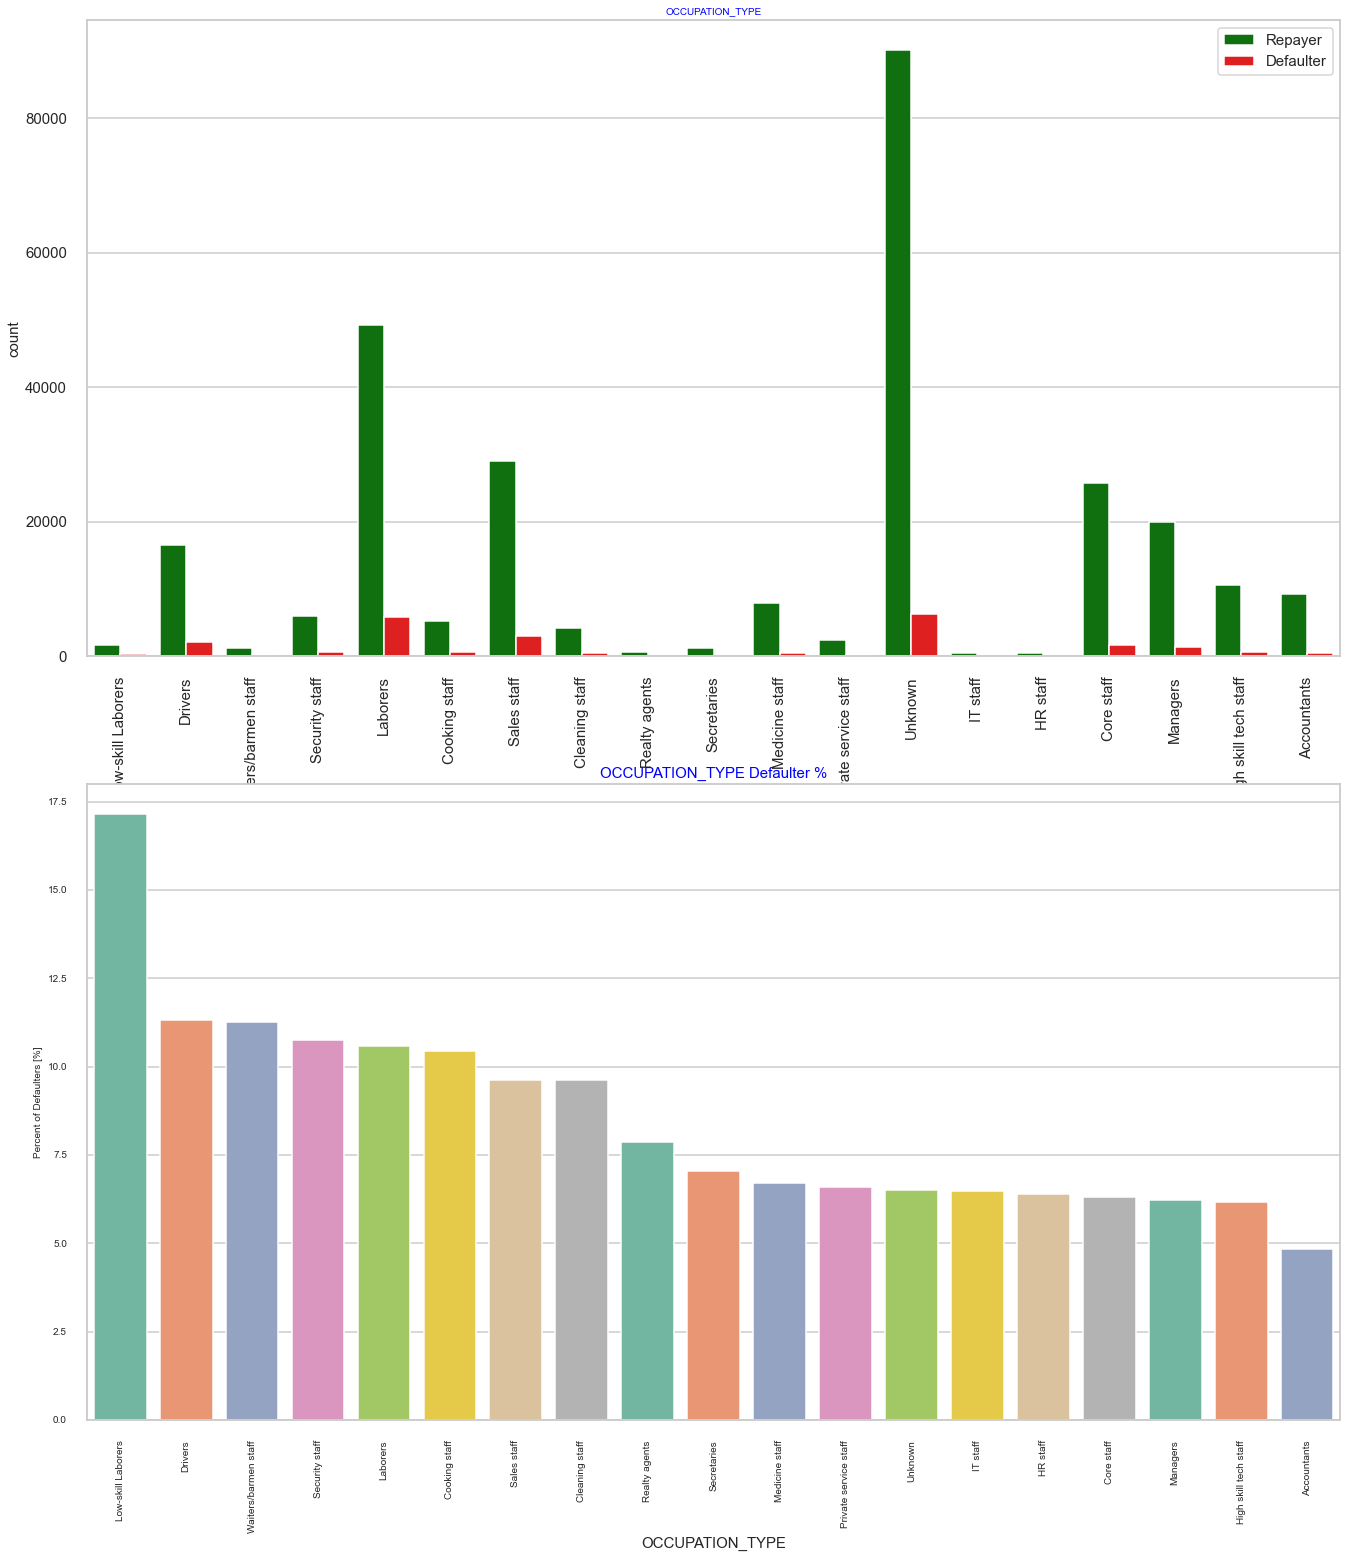

In [145]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

#### Kesimpulan:
+ Sebagian besar pinjaman diambil oleh Buruh, diikuti oleh staf Penjualan. Staf TI mengambil jumlah pinjaman terendah.
+ Kategori dengan persentase pinjaman tidak terbayar tertinggi adalah Pekerja Berketerampilan Rendah (di atas 17%), diikuti oleh Staf Pengemudi dan Pelayan/Barmen, Staf Keamanan, Pekerja dan Staf Memasak.

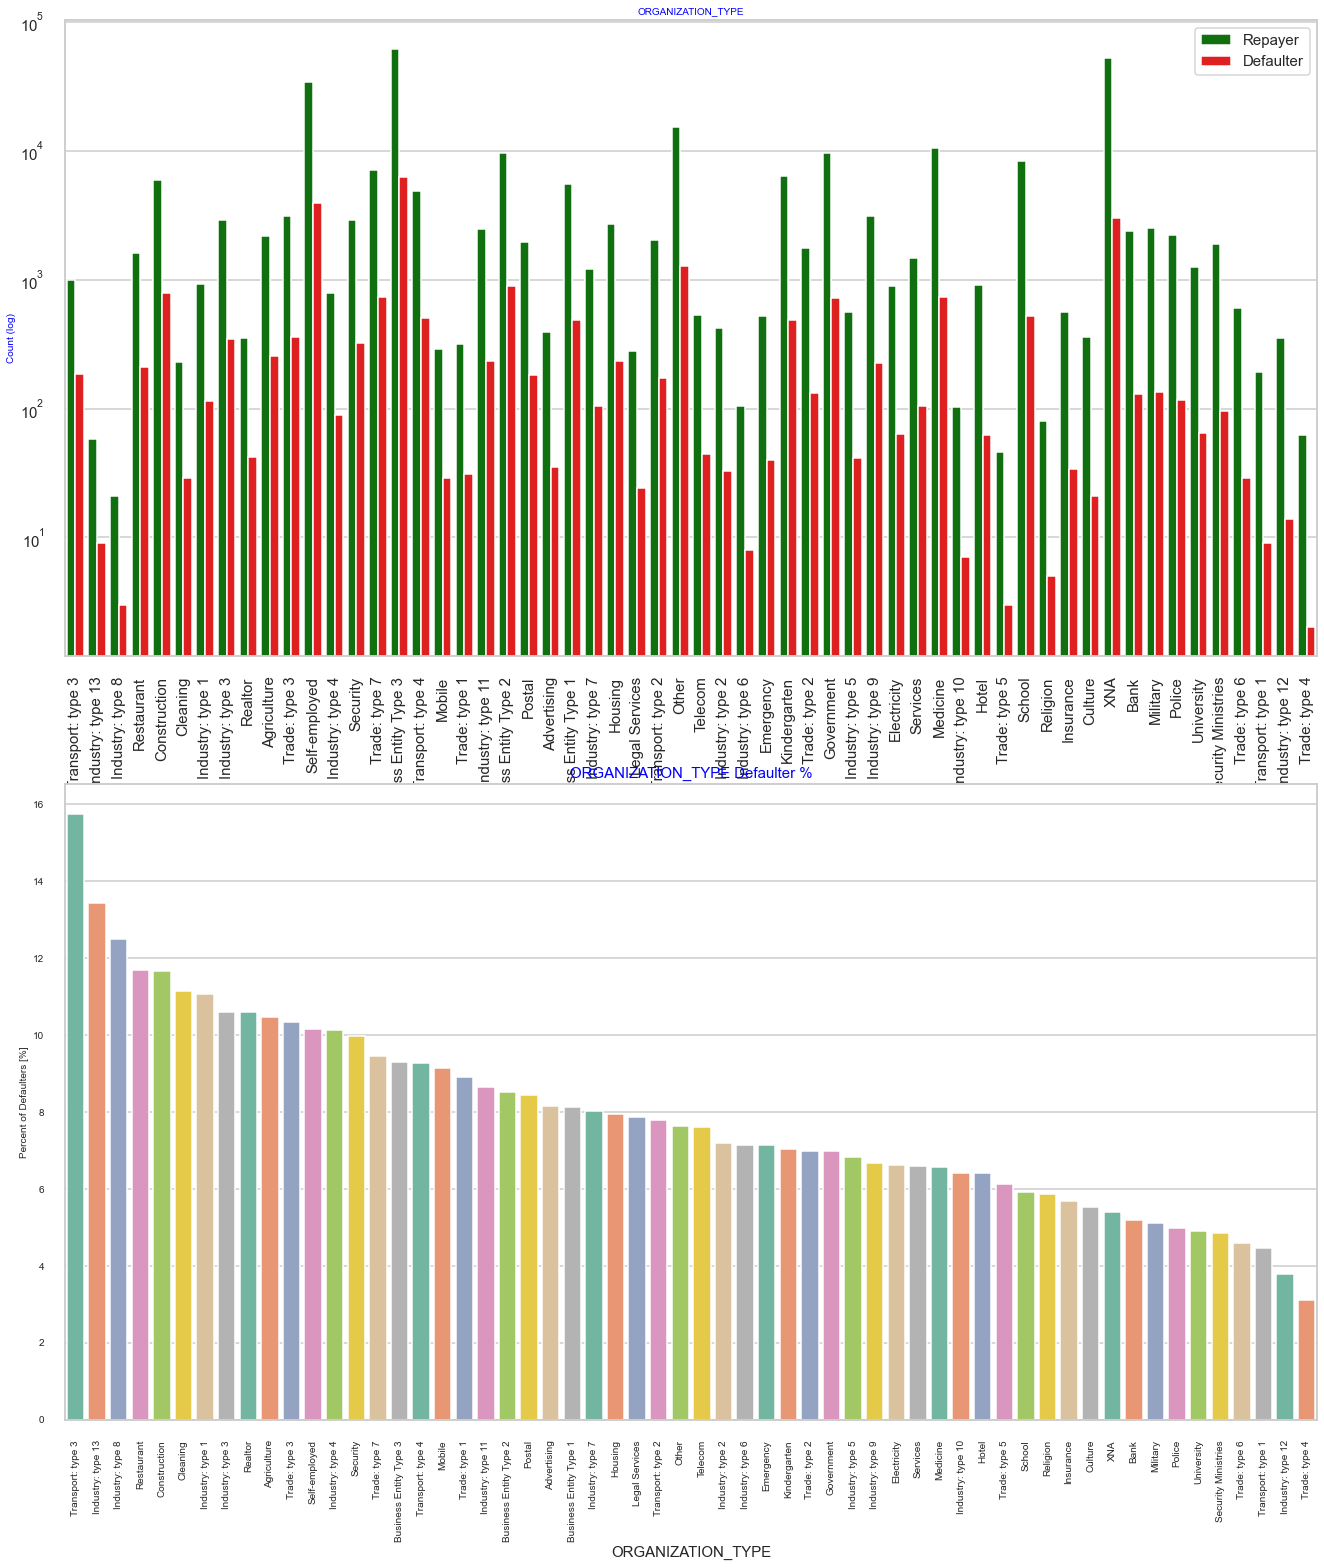

In [146]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

#### Kesimpulan:
+ Organisasi dengan persentase tertinggi dari pinjaman yang tidak dilunasi adalah Transportasi: tipe 3 (16%), Industri: tipe 13 (13,5%), Industri: tipe 8 (12,5%) dan Restoran (kurang dari 12%). Orang yang bekerja sendiri memiliki tingkat gagal bayar yang relatif tinggi, dan dengan demikian harus dihindari untuk disetujui untuk pinjaman atau memberikan pinjaman dengan tingkat bunga yang lebih tinggi untuk mengurangi risiko gagal bayar.
+ Sebagian besar orang yang mengajukan pinjaman berasal dari Badan Usaha Tipe 3
+ Untuk jumlah aplikasi yang sangat tinggi, informasi jenis Organisasi tidak tersedia (XNA)

Dapat dilihat bahwa kategori tipe organisasi berikut memiliki mangkir yang lebih rendah sehingga lebih aman untuk memberikan pinjaman:

    + Tipe Perdagangan 4 dan 5
    + Tipe industri 8

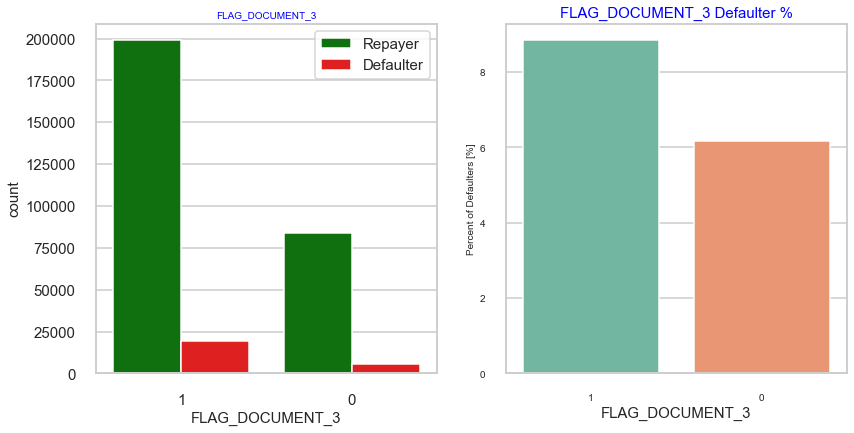

In [147]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

#### Kesimpulan:
+ Tidak ada korelasi yang signifikan antara pembayar dan mangkir dalam hal penyerahan dokumen 3 seperti yang kita lihat bahkan jika pemohon telah menyerahkan dokumen, mereka telah gagal sedikit lebih (~9%) daripada yang belum menyerahkan dokumen (6%)

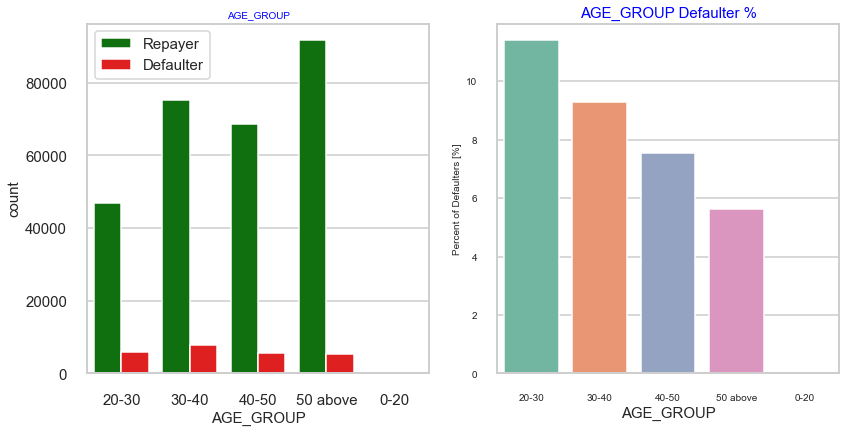

In [148]:
# Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

#### Kesimpulan:
+ Orang-orang dalam rentang kelompok usia 20-40 memiliki kemungkinan gagal bayar yang lebih tinggi
+ Orang yang berusia di atas 50 tahun memiliki kemungkinan gagal yang rendah

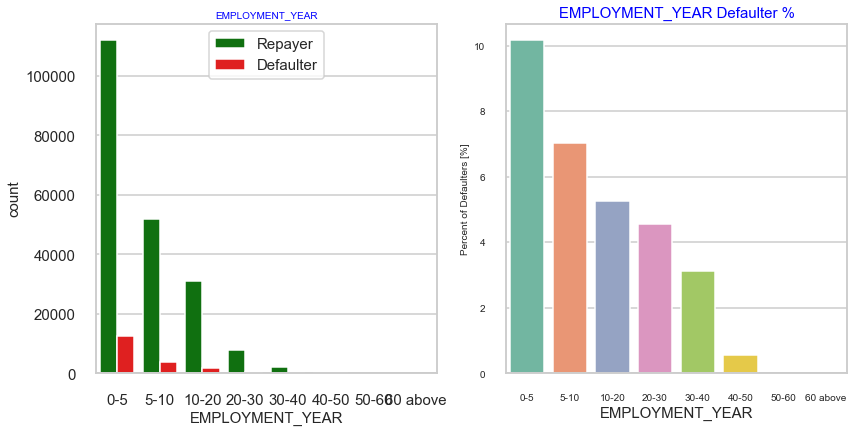

In [149]:
# Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYMENT_YEAR",False,False,True)

#### Kesimpulan:
+ Mayoritas pelamar telah bekerja di antara 0-5 tahun. Peringkat default grup ini juga paling tinggi yaitu 10%
+ Dengan peningkatan tahun kerja, tingkat default secara bertahap menurun dengan orang-orang yang memiliki pengalaman 40+ tahun memiliki tingkat default kurang dari 1%

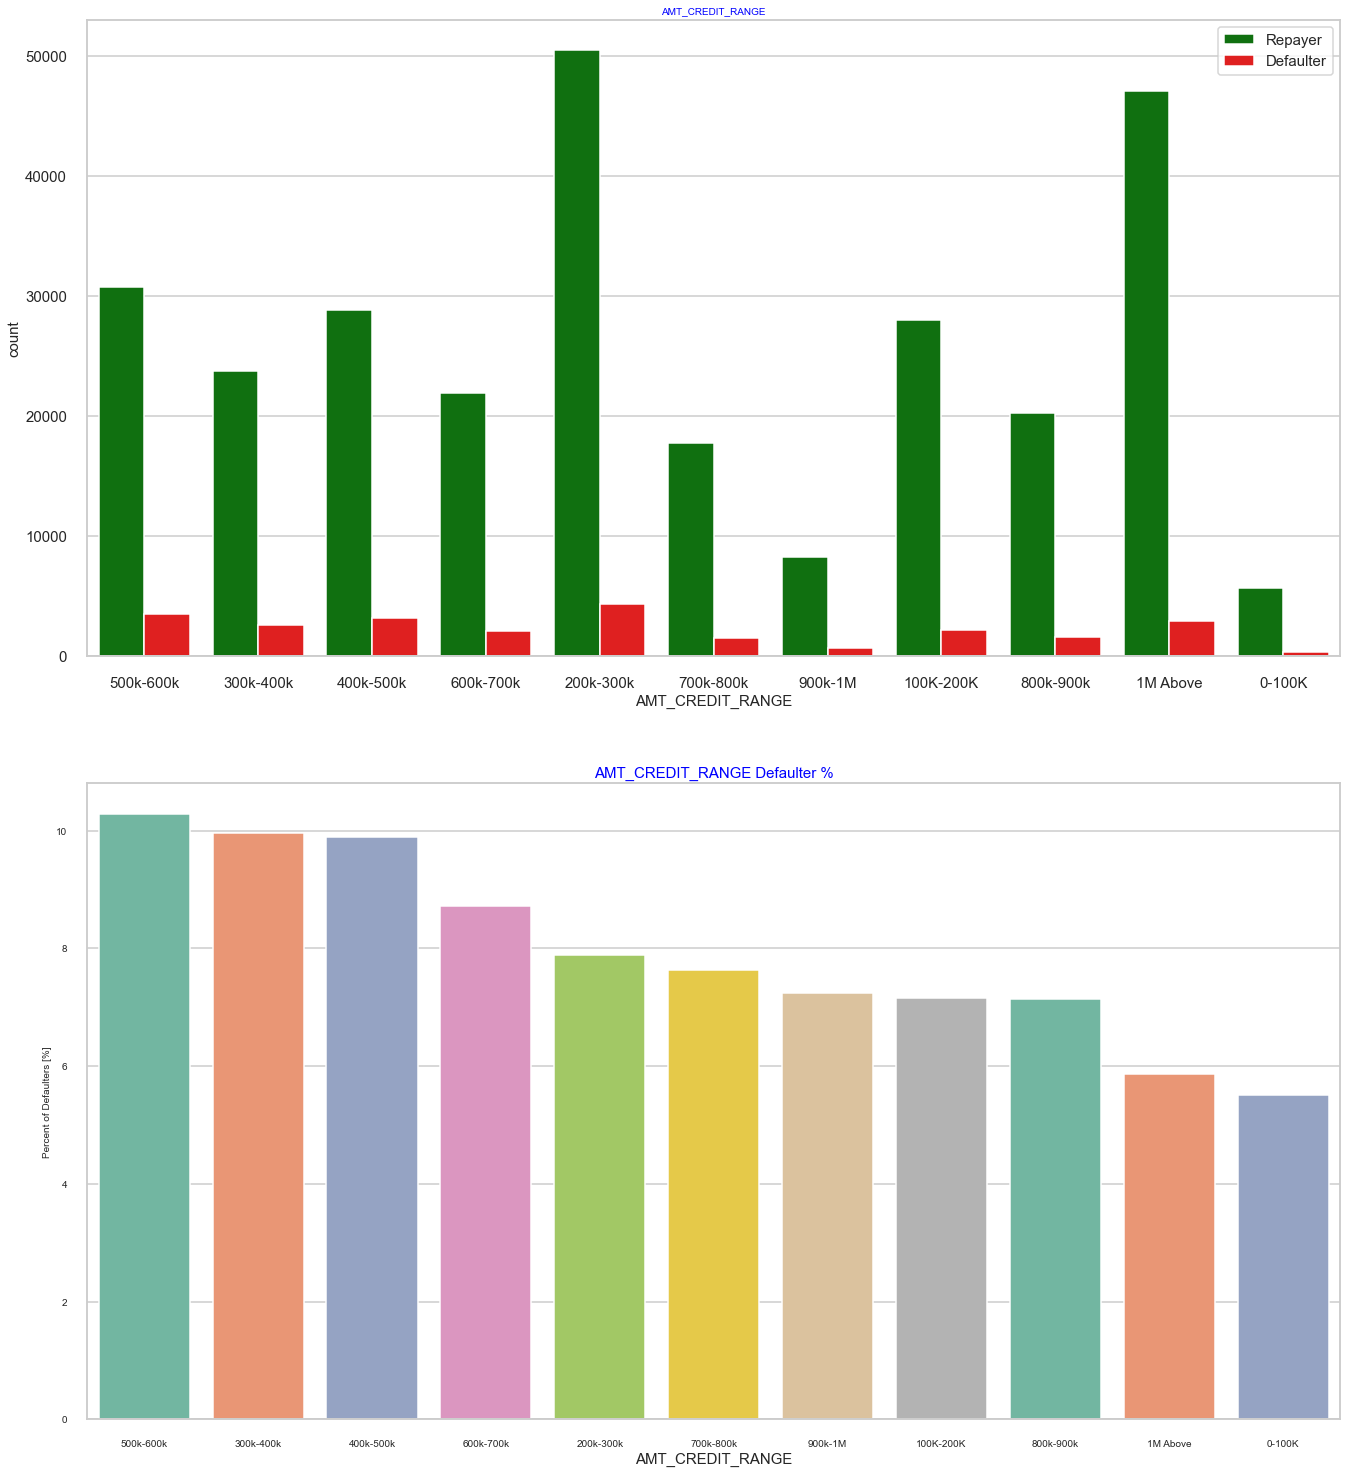

In [150]:
# Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,False,False)

#### Kesimpulan:
+ Lebih dari 80% dari pinjaman yang diberikan adalah untuk jumlah kurang dari 900.000
+ Orang yang mendapatkan pinjaman untuk 300-600k cenderung default lebih dari yang lain.

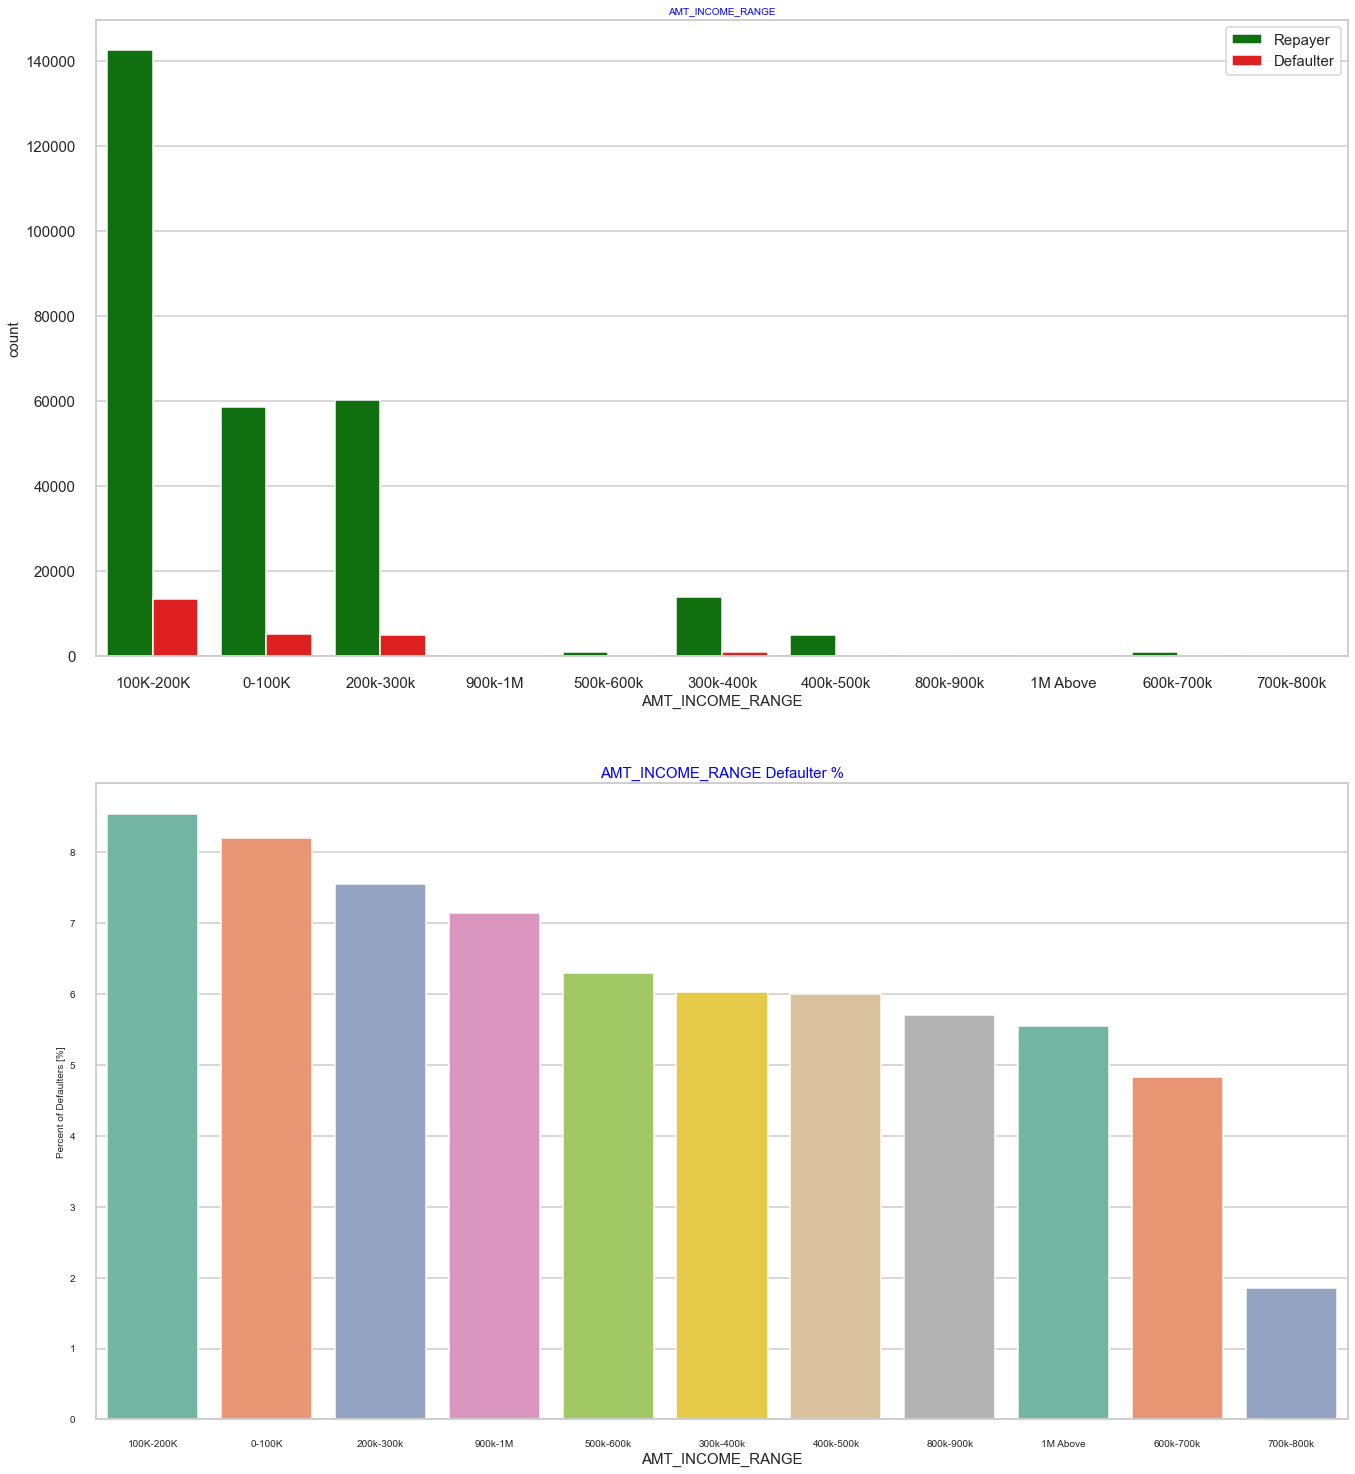

In [151]:
# Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

#### Kesimpulan:
+ 90% dari aplikasi memiliki total Penghasilan kurang dari 300.000
+ Aplikasi dengan Penghasilan kurang dari 300.000 memiliki kemungkinan gagal yang tinggi
+ Pemohon dengan Penghasilan lebih dari 700.000 lebih kecil kemungkinannya untuk default

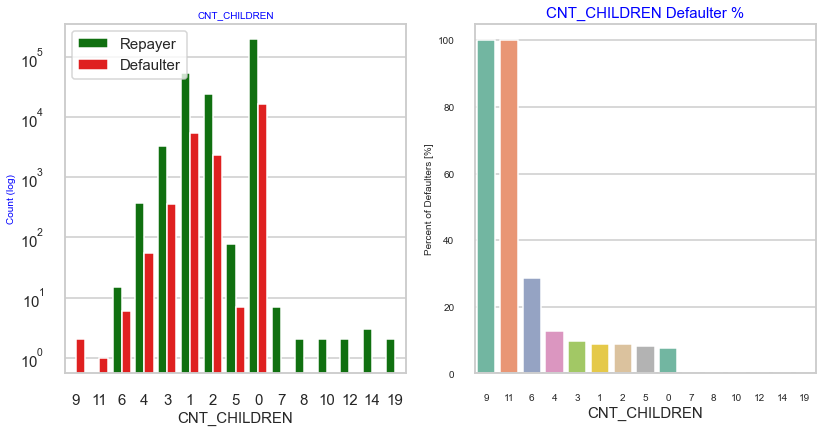

In [152]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

#### Kesimpulan:
+ Sebagian besar pelamar tidak memiliki anak
+ Sangat sedikit klien yang memiliki lebih dari 3 anak.
+ Klien yang memiliki lebih dari 4 anak memiliki tingkat default yang sangat tinggi dengan jumlah anak 9 dan 11 menunjukkan tingkat default 100%

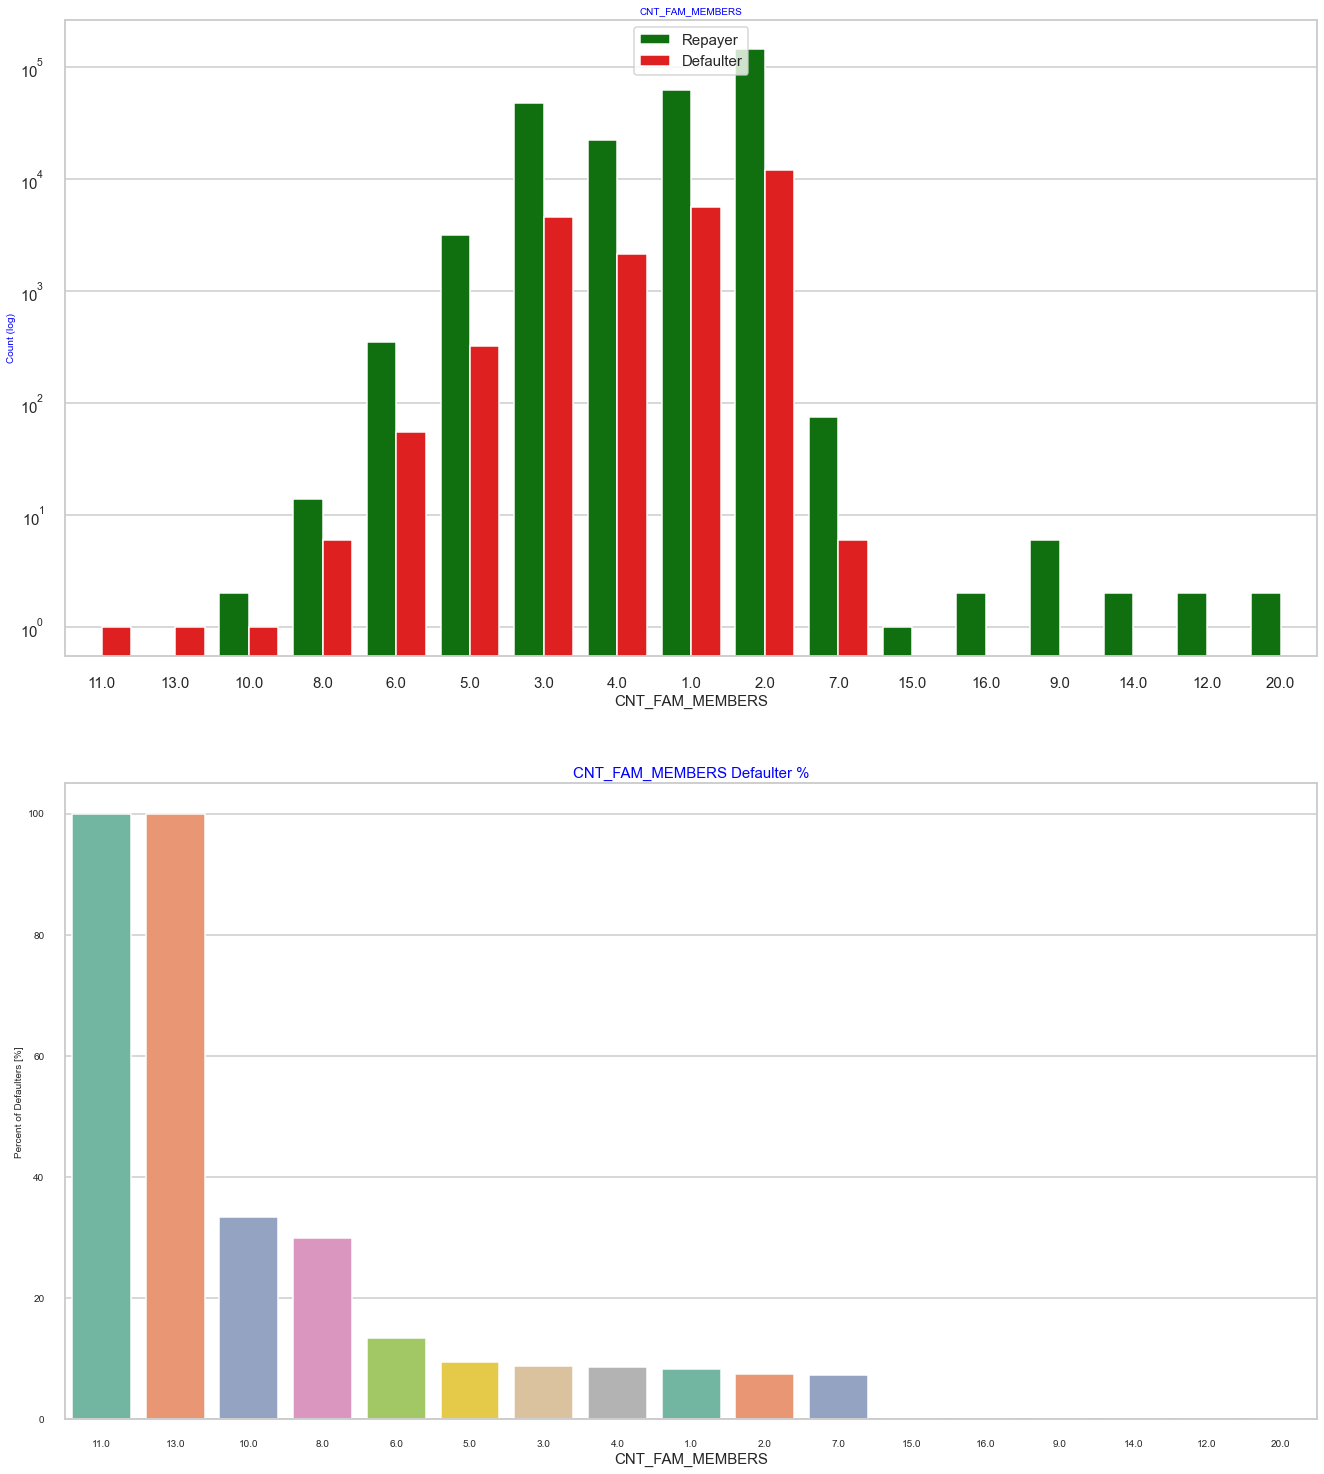

In [153]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)


#### Kesimpulan:
+ Anggota keluarga mengikuti tren yang sama seperti anak-anak di mana memiliki lebih banyak anggota keluarga meningkatkan risiko gagal bayar

## 5.3.2 Categorical Bi/Multivariate Analysis

In [154]:
applicationDF.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,6.525000,6.272260,1.8000,2.250,4.9500,8.43750,22.5000
Commercial associate,71617.0,2.029553,1.479742,0.2655,1.350,1.8000,2.25000,180.0009
Maternity leave,5.0,1.404000,1.268569,0.4950,0.675,0.9000,1.35000,3.6000
Pensioner,55362.0,1.364013,0.766503,0.2565,0.900,1.1700,1.66500,22.5000
State servant,21703.0,1.797380,1.008806,0.2700,1.125,1.5750,2.25000,31.5000
Student,18.0,1.705000,1.066447,0.8100,1.125,1.5750,1.78875,5.6250
Unemployed,22.0,1.105364,0.880551,0.2655,0.540,0.7875,1.35000,3.3750
Working,158774.0,1.631699,3.075777,0.2565,1.125,1.3500,2.02500,1170.0000


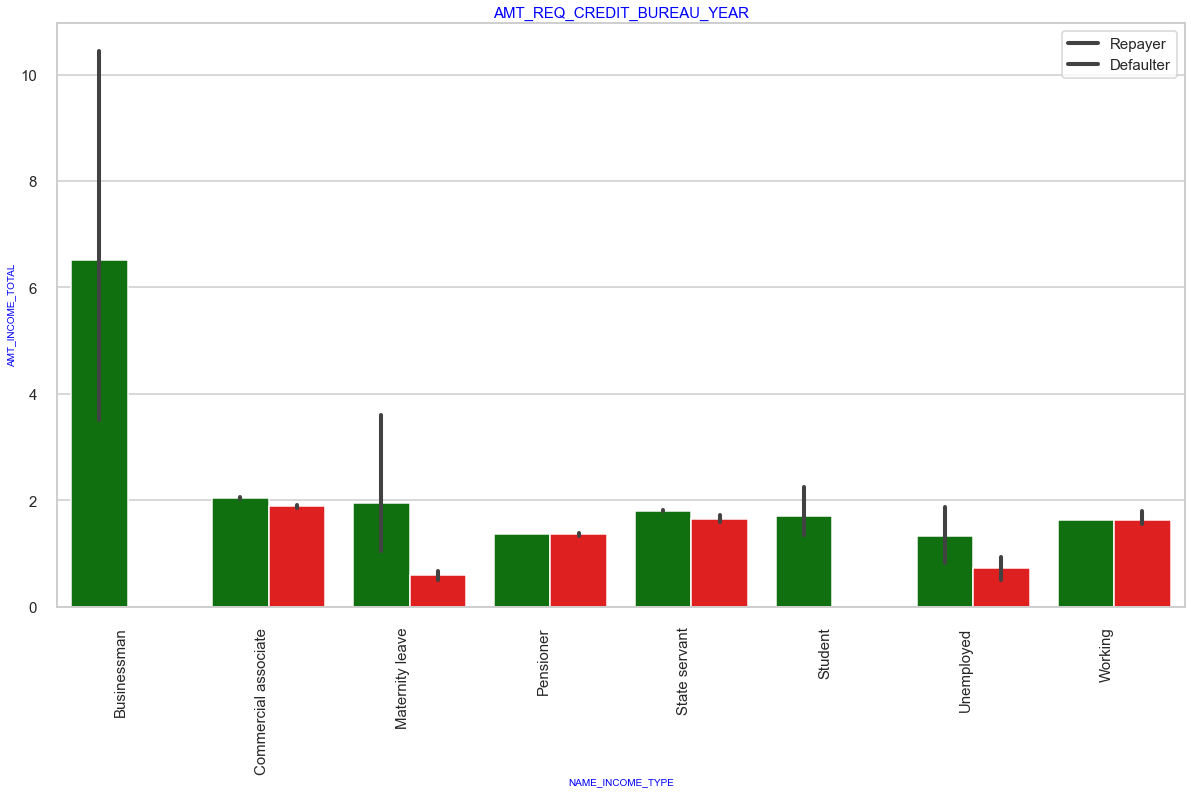

In [155]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",applicationDF,"TARGET",(18,10))

#### Kesimpulan:
+ Dapat dilihat bahwa pendapatan pengusaha adalah yang tertinggi dan kisaran perkiraan dengan tingkat kepercayaan 95% standar tampaknya menunjukkan bahwa pendapatan seorang pengusaha bisa berada di kisaran sedikit mendekati 4 lakh dan sedikit di atas 10 lakh.

## 5.4 Numeric Variables Analysis

### 5.4.1 Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

In [156]:
applicationDF.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CRED

In [157]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = applicationDF.loc[applicationDF['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = applicationDF.loc[applicationDF['TARGET']==1, cols_for_correlation] # Defaulters

### 5.4.2 Correlation between numeric variable

In [158]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
71,AMT_ANNUITY,AMT_CREDIT,0.771309
167,DAYS_EMPLOYED,DAYS_BIRTH,0.626114
70,AMT_ANNUITY,AMT_INCOME_TOTAL,0.418953
93,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.349462
47,AMT_CREDIT,AMT_INCOME_TOTAL,0.342799
138,DAYS_BIRTH,CNT_CHILDREN,0.336966
190,DAYS_REGISTRATION,DAYS_BIRTH,0.333151


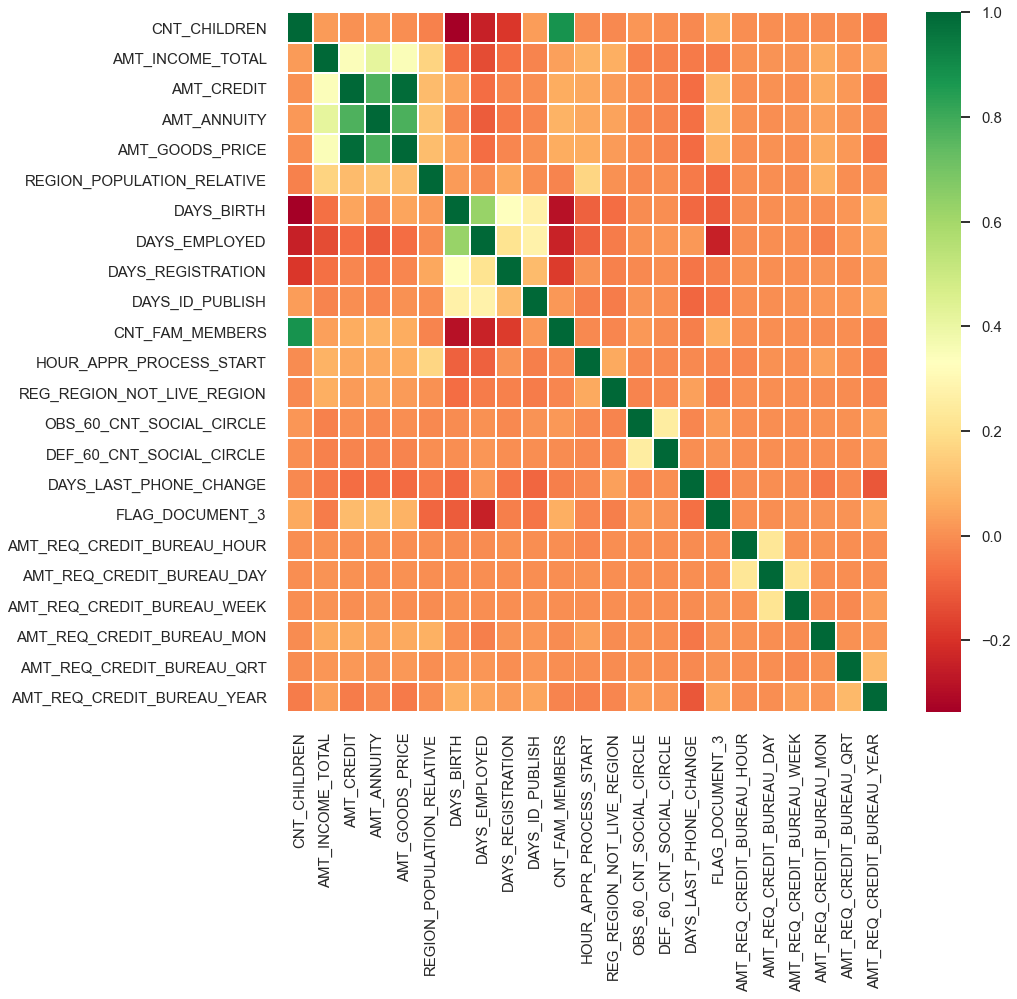

In [159]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Repayer_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

#### Kesimpulan:
+ Faktor-faktor yang berkorelasi di antara para pembayar:
+ Jumlah kredit sangat berkorelasi dengan
    + jumlah harga barang
    + anuitas pinjaman
    + jumlah pemasukan
+ Kita juga dapat melihat bahwa pembayaran kembali memiliki korelasi yang tinggi dalam jumlah hari kerja.

In [160]:
# Getting the top 10 correlation for the Defaulter data
corr_Defaulter = Defaulter_df.corr()
corr_Defaulter = corr_Defaulter.where(np.triu(np.ones(corr_Defaulter.shape),k=1).astype(np.bool))
corr_df_Defaulter = corr_Defaulter.unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

,VAR1,VAR2,Correlation
94,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
230,CNT_FAM_MEMBERS,CNT_CHILDREN,0.885484
95,AMT_GOODS_PRICE,AMT_ANNUITY,0.752699
71,AMT_ANNUITY,AMT_CREDIT,0.752195
167,DAYS_EMPLOYED,DAYS_BIRTH,0.582185
190,DAYS_REGISTRATION,DAYS_BIRTH,0.289114
375,FLAG_DOCUMENT_3,DAYS_EMPLOYED,0.272169
335,DEF_60_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.264159
138,DAYS_BIRTH,CNT_CHILDREN,0.259109
213,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252863


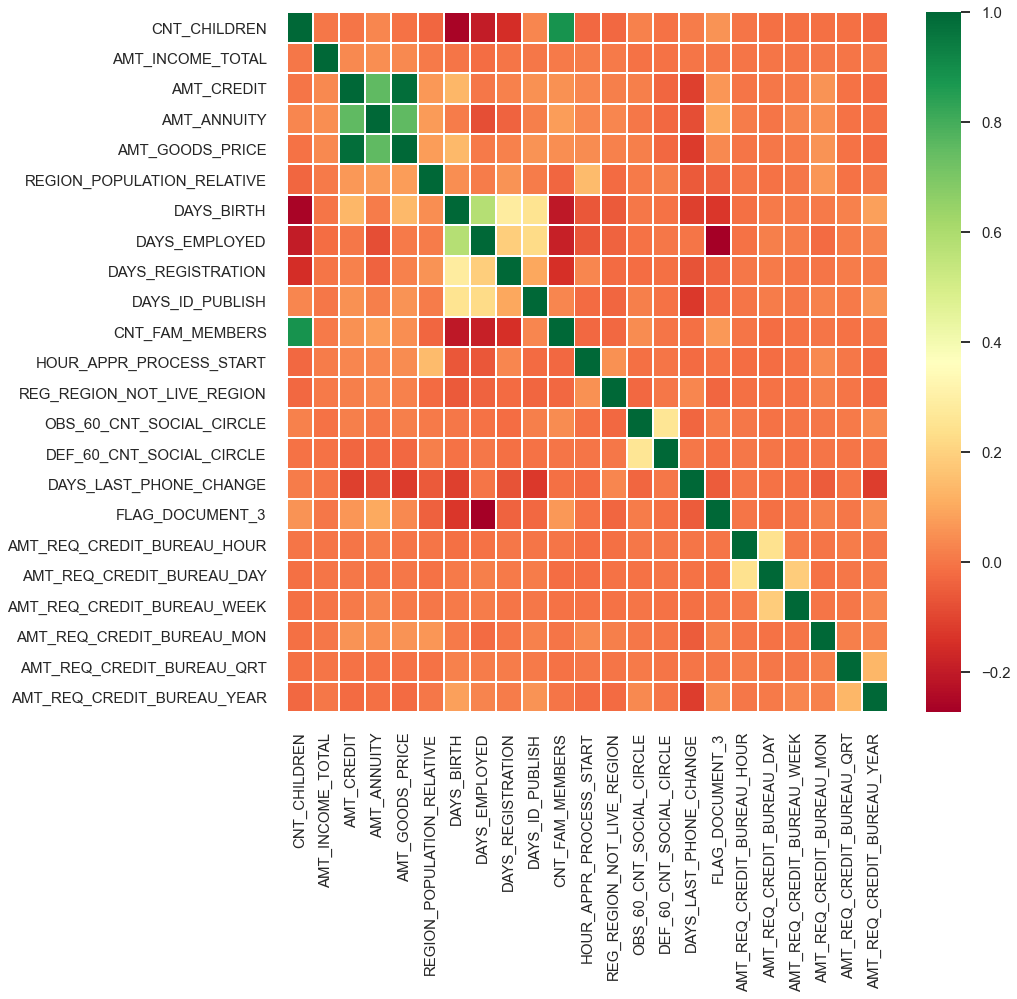

In [161]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

#### Kesimpulan:
+ Jumlah kredit sangat berkorelasi dengan jumlah harga barang yang sama dengan pelunasan.
+ Tapi korelasi anuitas pinjaman dengan jumlah kredit telah sedikit berkurang di mangkir (0,75) bila dibandingkan dengan pembayar (0,77)
+ Kita juga dapat melihat bahwa yang membayar kembali memiliki korelasi yang tinggi dalam jumlah hari kerja (0,62) jika dibandingkan dengan yang mangkir (0,58).
+ Ada penurunan tajam dalam korelasi antara total pendapatan klien dan jumlah kredit (0,038) di antara yang mangkir sedangkan 0,342 di antara yang membayar kembali.
+ Korelasi hari_lahir dan jumlah anak telah berkurang menjadi 0,259 pada yang mangkir jika dibandingkan dengan 0,337 pada yang membayar kembali.
+ Ada sedikit peningkatan dalam jumlah yang gagal untuk diamati dalam lingkaran sosial di antara yang mangkir (0.264) bila dibandingkan dengan yang membayar (0.254)

### 5.4.3 Numerical Univariate Analysis

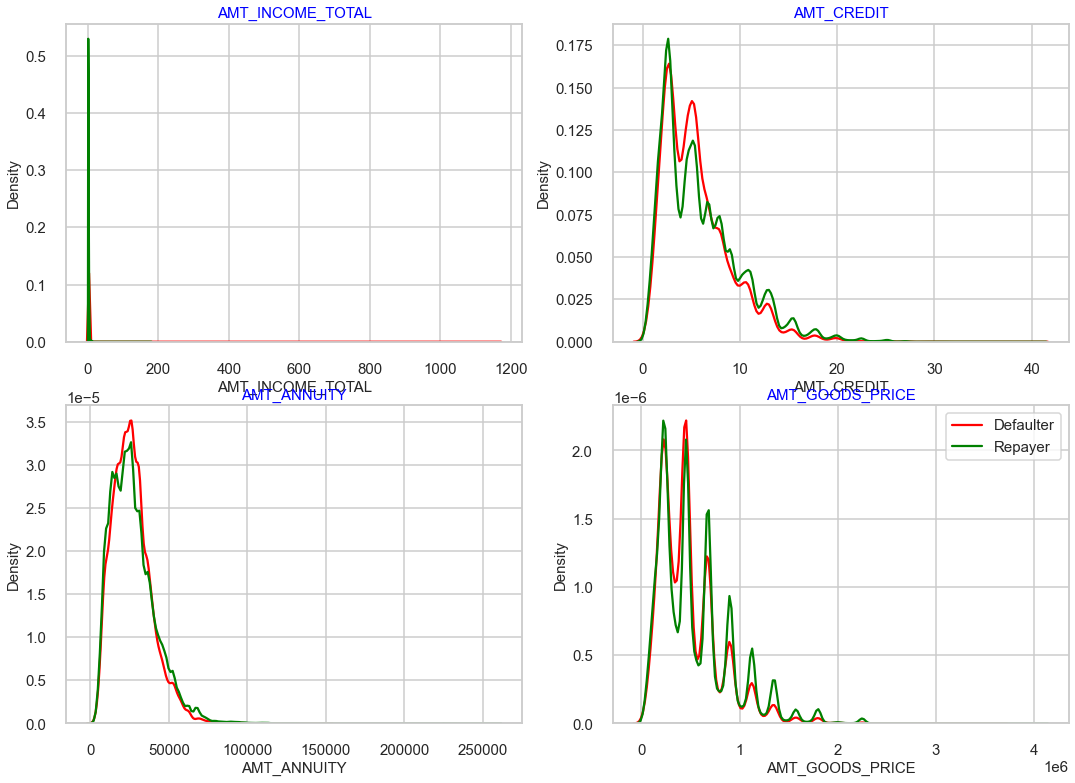

In [162]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

#### Kesimpulan:
+ Sebagian besar pinjaman tidak diberikan untuk harga barang di bawah 10 lakh
+ Kebanyakan orang membayar anuitas di bawah 50000 untuk pinjaman kredit
+ Jumlah kredit pinjaman sebagian besar kurang dari 10 lakh
+ Distribusi pembayaran kembali dan mangkir tumpang tindih di semua plot dan karenanya kami tidak dapat menggunakan variabel ini secara terpisah untuk membuat keputusan

### 5.4.4 Numerical Bivariate Analysis

<Figure size 1080x432 with 0 Axes>

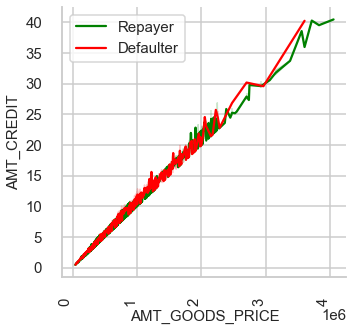

In [163]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',applicationDF,"TARGET", "line", ['g','r'], False,(15,6))

#### Kesimpulan:
Ketika jumlah kredit melampaui 3M, ada peningkatan mangkir.

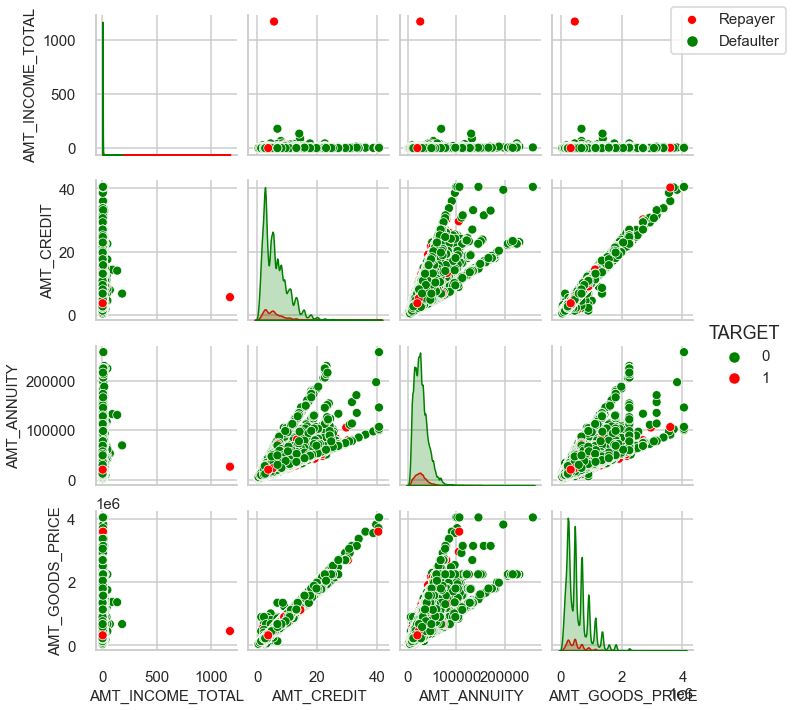

In [165]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

#### Kesimpulan:
+ Ketika amt_annuity >15000 amt_goods_price> 3M, ada kemungkinan lebih kecil untuk mangkir
+ AMT_CREDIT dan AMT_GOODS_PRICE sangat berkorelasi karena berdasarkan scatterplot di mana sebagian besar data dikonsolidasikan dalam bentuk garis
+ Ada sangat sedikit yang mangkir untuk AMT_CREDIT >3M
+ Inferensi yang terkait dengan plot distribusi telah disebutkan di bagian inferensi grafik distplot sebelumnya

# 6. Merged Dataframes Analysis

In [166]:
#merge both the dataframe on SK_ID_CURR with Inner Joins
loan_process_df = pd.merge(applicationDF, previousDF, how='inner', on='SK_ID_CURR')
loan_process_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AGE,AGE_GROUP,YEARS_EMPLOYED,EMPLOYMENT_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_DECISION_GROUP
0,100002,1,Cash loans,M,N,Y,0,2.025,4.065975,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,-1134.0,1,0.0,0.0,0.0,0.0,0.0,1.0,200k-300k,400k-500k,25,20-30,1,0-5,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,400-800
1,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low,400-800
2,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest,800-1200
3,100003,0,Cash loans,F,N,N,0,2.700,12.935025,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,-828.0,1,0.0,0.0,0.0,0.0,0.0,0.0,200k-300k,1M Above,45,40-50,3,0-5,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest,2000-2400
4,100004,0,Revolving loans,M,Y,Y,0,0.675,1.350000,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-815.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0-100K,100K-200K,52,50 above,0,NaN,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest,800-1200


In [167]:
#Checking the details of the merged dataframe
loan_process_df.shape

(1413701, 74)

In [168]:
# Checking the element count of the dataframe
loan_process_df.size

104613874

In [169]:
# checking the columns and column types of the dataframe
loan_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 74 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1413701 non-null  int64   
 1   TARGET                       1413701 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1413701 non-null  category
 3   CODE_GENDER                  1413701 non-null  category
 4   FLAG_OWN_CAR                 1413701 non-null  category
 5   FLAG_OWN_REALTY              1413701 non-null  category
 6   CNT_CHILDREN                 1413701 non-null  int64   
 7   AMT_INCOME_TOTAL             1413701 non-null  float64 
 8   AMT_CREDIT_x                 1413701 non-null  float64 
 9   AMT_ANNUITY_x                1413608 non-null  float64 
 10  AMT_GOODS_PRICE_x            1412493 non-null  float64 
 11  NAME_TYPE_SUITE              1413701 non-null  category
 12  NAME_INCOME_TYPE            

In [170]:
# Checking merged dataframe numerical columns statistics
loan_process_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413700e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06
mean,2.784813e+05,8.655296e-02,4.048933e-01,1.733160e+00,5.875537e+00,2.701702e+04,5.277186e+05,2.074985e-02,1.632105e+04,7.266347e+04,5.003233e+03,3.034563e+03,2.150501e+00,1.198433e+01,1.207327e-02,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,-1.084701e+03,7.385600e-01,5.484894e-03,6.028149e-03,3.410198e-02,2.664913e-01,3.196935e-01,2.691239e+00,4.421384e+01,1.985500e+02,1.922744e+06,1.484032e+04,1.752436e+05,1.963541e+05,1.854396e+05,8.803670e+02,3.149878e+02,1.256367e+01
std,1.028118e+05,2.811789e-01,7.173454e-01,1.985734e+00,3.849173e+00,1.395116e+04,3.532465e+05,1.334702e-02,4.344557e+03,1.433374e+05,3.551051e+03,1.507376e+03,9.006787e-01,3.232181e+00,1.092132e-01,2.530715e+00,4.658973e-01,2.508953e+00,3.790588e-01,7.999369e+02,4.394192e-01,7.702591e-02,1.001966e-01,2.012902e-01,9.268428e-01,8.781444e-01,2.157176e+00,1.190217e+01,3.926378e+02,5.327153e+05,1.316370e+04,2.936222e+05,3.194813e+05,2.881244e+05,7.835402e+02,7.695082e+03,1.448807e+01
min,1.000020e+05,0.000000e+00,0.000000e+00,2.565000e-01,4.500000e-01,1.615500e+03,4.050000e+04,2.900000e-04,7.489000e+03,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.292000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,1.000001e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00
25%,1.893640e+05,0.000000e+00,0.000000e+00,1.125000e+00,2.700000e+00,1.682100e+04,2.385000e+05,1.003200e-02,1.273900e+04,1.042000e+03,2.001000e+03,1.783000e+03,2.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.683000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.400000e+01,2.000000e+00,1.461346e+06,7.406055e+03,1.975050e+04,2.488050e+04,4.500000e+04,2.710000e+02,-1.000000e+00,0.000000e+00
50%,2.789920e+05,0.000000e+00,0.000000e+00,1.575000e+00,5.084955e+00,2.492550e+04,4.500000e+05,1.885000e-02,1.604400e+04,2.401000e+03,4.508000e+03,3.330000e+03,2.000000e+00,1.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.011000e+03,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,4.300000e+01,6.000000e+00,1.922698e+06,1.125000e+04,7.087050e+04,8.059500e+04,7.087500e+04,5.820000e+02,4.000000e+00,1.000000e+01
75%,3.675560e+05,0.000000e+00,1.000000e+00,2.070000e+00,8.079840e+00,3.454200e+04,6.795000e+05,2.866300e-02,1.998000e+04,6.313000e+03,7.510000e+03,4.319000e+03,3.000000e+00,1.400000e+01,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,-3.960000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,5.400000e+01,1.700000e+01,2.384012e+06,1.67479

In [171]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis

L0 = loan_process_df[loan_process_df['TARGET']==0] # Repayers
L1 = loan_process_df[loan_process_df['TARGET']==1] # Defaulters


Plotting Contract Status vs purpose of the loan:

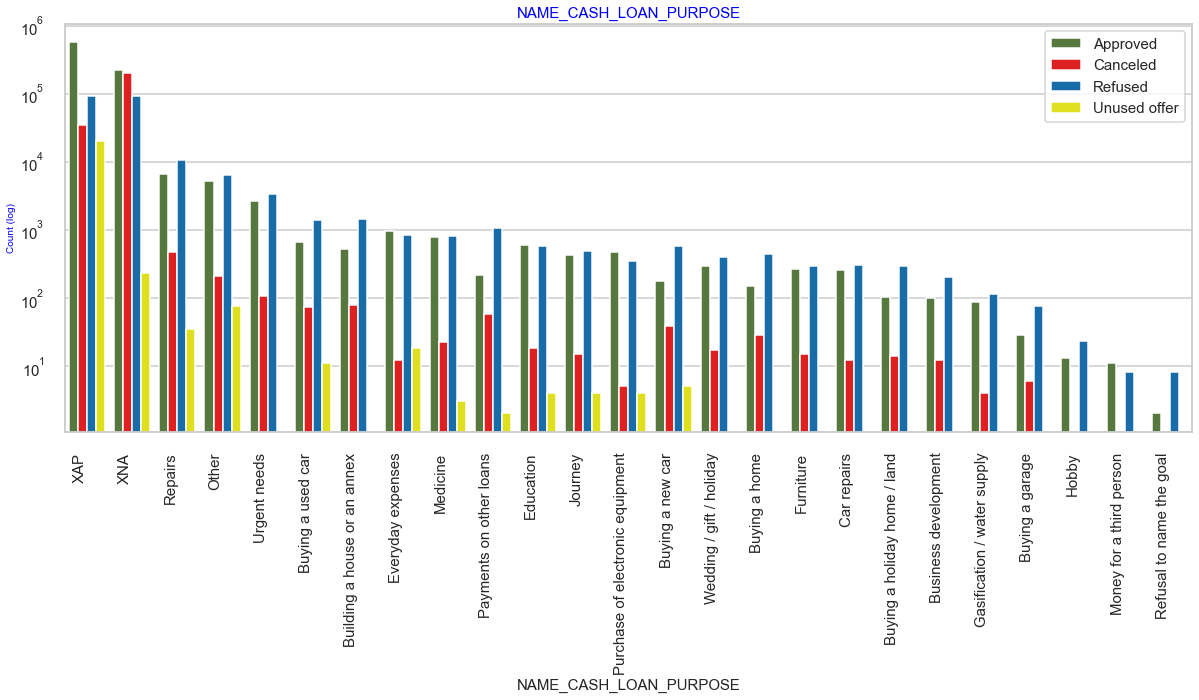

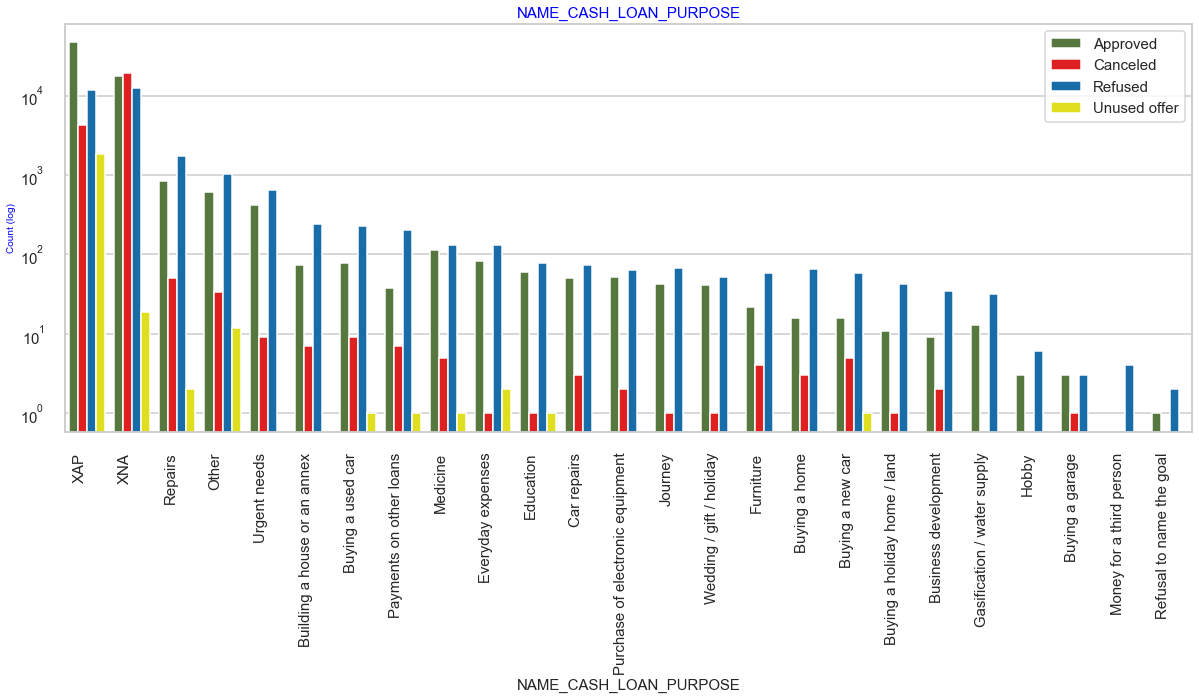

In [172]:
univariate_merged("NAME_CASH_LOAN_PURPOSE",L0,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

univariate_merged("NAME_CASH_LOAN_PURPOSE",L1,"NAME_CONTRACT_STATUS",["#548235","#FF0000","#0070C0","#FFFF00"],True,(18,7))

#### Kesimpulan:
+ Tujuan pinjaman memiliki jumlah nilai yang tidak diketahui (XAP, XNA) yang tinggi
+ Pinjaman yang diambil untuk tujuan Perbaikan tampaknya memiliki tingkat default tertinggi
+ Permohonan dengan jumlah yang sangat tinggi telah ditolak oleh bank atau ditolak oleh klien yang bertujuan untuk perbaikan atau lainnya. Hal ini menunjukkan bahwa tujuan perbaikan dianggap berisiko tinggi oleh bank dan apakah mereka ditolak atau bank menawarkan tingkat bunga pinjaman yang sangat tinggi yang tidak layak oleh klien, sehingga mereka menolak pinjaman.

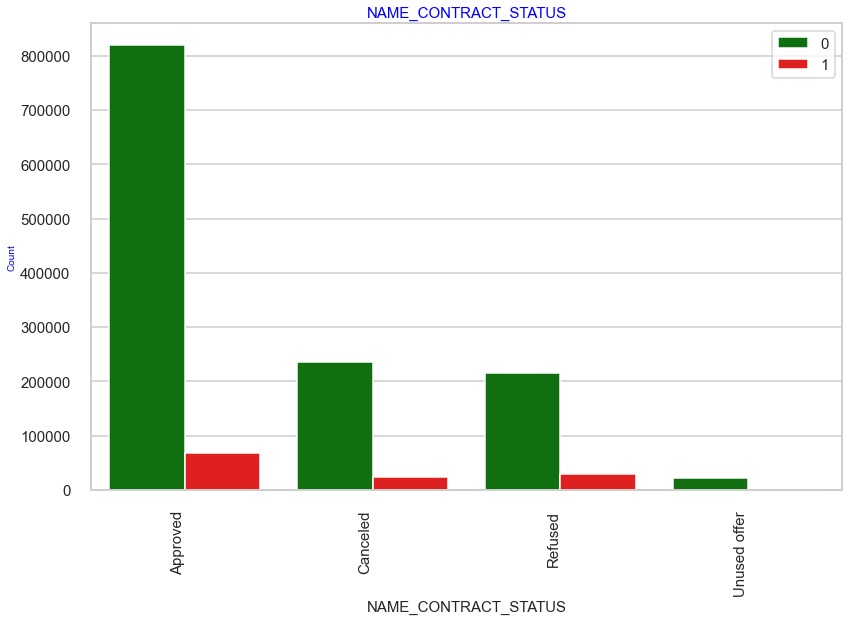

                             Counts Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%


In [173]:
# Checking the Contract Status based on loan repayment status and whether there is any business loss or financial loss
univariate_merged("NAME_CONTRACT_STATUS",loan_process_df,"TARGET",['g','r'],False,(12,8))
g = loan_process_df.groupby("NAME_CONTRACT_STATUS")["TARGET"]
df1 = pd.concat([g.value_counts(),round(g.value_counts(normalize=True).mul(100),2)],axis=1, keys=('Counts','Percentage'))
df1['Percentage'] = df1['Percentage'].astype(str) +"%" # adding percentage symbol in the results for understanding
print (df1)

#### Kesimpulan:
+ 90% dari klien yang sebelumnya dibatalkan sebenarnya telah melunasi pinjamannya. Meninjau kembali suku bunga akan meningkatkan peluang bisnis untuk klien ini
+ 88% dari klien yang sebelumnya telah ditolak pinjamannya telah membayar kembali pinjaman dalam kasus saat ini.
+ Alasan penolakan harus dicatat untuk analisis lebih lanjut karena klien ini akan berubah menjadi pelanggan potensial yang membayar kembali.

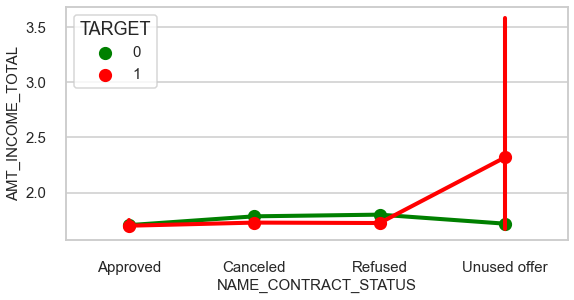

In [174]:
# plotting the relationship between income total and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')


#### Kesimpulan:
+ Plot poin menunjukkan bahwa orang-orang yang tidak menggunakan penawaran sebelumnya telah gagal bahkan ketika pendapatan rata-rata lebih tinggi dari yang lain

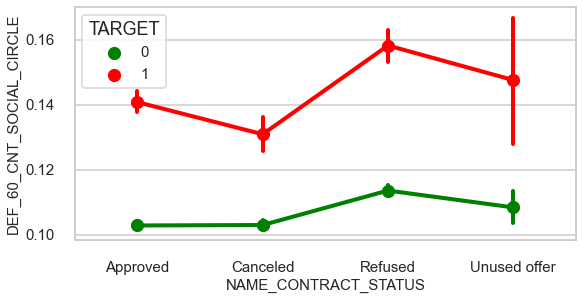

In [175]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status
merged_pointplot("NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

#### Kesimpulan:
+ Klien yang memiliki rata-rata 0,13 atau lebih tinggi skor DEF_60_CNT_SOCIAL_CIRCLE cenderung lebih default dan karenanya lingkaran sosial klien harus dianalisis sebelum memberikan pinjaman.

# Kesimpulan Akhir berdasar Data Ilmiah

+ Setelah menganalisis kumpulan data, ada beberapa atribut klien yang dengannya bank dapat mengidentifikasi apakah mereka akan membayar kembali pinjamannya atau tidak. Analisisnya adalah sebagai berikut dengan faktor-faktor pendukung dan kategorisasinya:

#### Faktor Penentu apakah pemohon akan menjadi Pembayar:

+ NAME_EDUCATION_TYPE: Gelar akademik memiliki lebih sedikit default.
+ NAME_INCOME_TYPE: Pelajar dan Pengusaha tidak memiliki default.
+ REGION_RATING_CLIENT: RATING 1 lebih aman.
+ ORGANIZATION_TYPE: Klien dengan Tipe Perdagangan 4 dan 5 dan tipe Industri 8 mengalami default kurang dari 3%
+ DAYS_BIRTH: Orang di atas usia 50 memiliki kemungkinan gagal yang rendah
+ DAYS_EMPLOYED: Klien dengan pengalaman 40+ tahun memiliki tarif default kurang dari 1%
+ AMT_INCOME_TOTAL: Pemohon dengan Penghasilan lebih dari 700.000 lebih kecil kemungkinannya untuk default
+ NAME_CASH_LOAN_PURPOSE: Pinjaman yang dibeli untuk Hobi, Membeli garasi sebagian besar dilunasi.
+ CNT_CHILDREN: Orang dengan nol hingga dua anak cenderung membayar kembali pinjamannya.

### Faktor Penentu apakah pemohon akan menjadi Defaulter:

+ CODE_GENDER: Pria memiliki tingkat default yang relatif lebih tinggi
+ NAME_FAMILY_STATUS : Orang yang memiliki perkawinan sipil atau yang lajang banyak.
+ NAME_EDUCATION_TYPE: Orang dengan pendidikan Sekolah Menengah Pertama & Menengah
+ NAME_INCOME_TYPE: Klien yang sedang cuti hamil ATAU sering menganggur.
+ REGION_RATING_CLIENT: Orang yang tinggal di Peringkat 3 memiliki default tertinggi.
+ OCCUPATION_TYPE: Hindari Pekerja Berketerampilan Rendah, Pengemudi dan Staf Pelayan/Barmen, Staf Keamanan, Pekerja dan Staf Memasak karena tarif standarnya sangat besar.
+ ORGANIZATION_TYPE: Organisasi dengan persentase tertinggi dari pinjaman yang tidak dilunasi adalah Transportasi: tipe 3 (16%), Industri: tipe 13 (13,5%), Industri: tipe 8 (12,5%) dan Restoran (kurang dari 12%). Wiraswasta memiliki tingkat gagal bayar yang relatif tinggi, dan dengan demikian harus dihindari untuk disetujui untuk pinjaman atau memberikan pinjaman dengan tingkat bunga yang lebih tinggi untuk mengurangi risiko gagal bayar.
+ DAYS_BIRTH: Hindari orang muda yang berada dalam kelompok usia 20-40 karena mereka memiliki kemungkinan gagal yang lebih tinggi
+ DAYS_EMPLOYED: Orang yang memiliki masa kerja kurang dari 5 tahun memiliki tingkat default yang tinggi.
+ CNT_CHILDREN & CNT_FAM_MEMBERS: Klien yang memiliki anak sama dengan atau lebih dari 9 default 100% dan karenanya aplikasi mereka harus ditolak.
+ AMT_GOODS_PRICE: Ketika jumlah kredit melebihi 3M, ada peningkatan mangkir.

Atribut berikut menunjukkan bahwa orang-orang dari kategori ini cenderung gagal tetapi kemudian karena jumlah orang dan jumlah pinjaman, bank dapat memberikan pinjaman dengan bunga yang lebih tinggi untuk mengurangi risiko gagal bayar sehingga mencegah kerugian bisnis:

+ NAME_HOUSING_TYPE: Tingginya jumlah aplikasi pinjaman berasal dari kategori orang yang tinggal di Apartemen Sewa & tinggal bersama orang tua dan karenanya menawarkan pinjaman akan mengurangi kerugian jika salah satu dari mereka gagal bayar.
+ AMT_CREDIT: Orang yang mendapatkan pinjaman untuk 300-600k cenderung default lebih dari yang lain dan karenanya memiliki bunga yang lebih tinggi khusus untuk rentang kredit ini akan ideal.
+ AMT_INCOME: Karena 90% dari aplikasi memiliki total Pendapatan kurang dari 300.000 dan mereka memiliki kemungkinan gagal bayar yang tinggi, mereka dapat ditawari pinjaman dengan bunga yang lebih tinggi dibandingkan dengan kategori pendapatan lainnya.
+ CNT_CHILDREN & CNT_FAM_MEMBERS: Klien yang memiliki 4 sampai 8 anak memiliki tingkat default yang sangat tinggi dan karenanya bunga yang lebih tinggi harus dikenakan pada pinjaman mereka.
+ NAME_CASH_LOAN_PURPOSE: Pinjaman yang diambil untuk tujuan Perbaikan tampaknya memiliki tingkat default tertinggi. Jumlah aplikasi yang sangat tinggi telah ditolak oleh bank atau ditolak oleh klien pada aplikasi sebelumnya juga yang bertujuan untuk perbaikan atau lainnya. Hal ini menunjukkan bahwa tujuan perbaikan dianggap berisiko tinggi oleh bank dan baik ditolak, atau bank menawarkan tingkat bunga pinjaman yang sangat tinggi yang tidak layak oleh klien, sehingga mereka menolak pinjaman. Pendekatan yang sama dapat diikuti di masa depan juga.

Saran lainnya:

+ 90% dari klien yang sebelumnya dibatalkan sebenarnya telah melunasi pinjamannya. Catat alasan pembatalan yang dapat membantu bank untuk menentukan dan menegosiasikan persyaratan dengan pelanggan yang membayar ini di masa depan untuk meningkatkan peluang bisnis.
+ 88% dari klien yang sebelumnya ditolak oleh bank untuk pinjaman sekarang telah berubah menjadi klien yang membayar kembali. Oleh karena itu mendokumentasikan alasan penolakan dapat mengurangi kerugian bisnis dan klien ini dapat dihubungi untuk pinjaman lebih lanjut.